In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, linalg
import os
import sys

In [2]:
df = pd.read_excel(os.path.join(os.getcwd(), 'LaviDataForModel.xls')).rename(columns={"mean_prctile33": "prctile33", "mean_three_ring": "mean_third_ring",
                                                                                             "median_three_ring": "median_third_ring",
                                                                                             "median_First_ring":"median_first_ring",
                                                                                             "mean_First_ring":"mean_first_ring",
                                                                                            "Meanci_1":"meanci_1",
                                                                                             "Meanci_2":"meanci_2"})
df.head(5)
Data = df[df.RTK_Num_All_Plots_Data.notnull()].copy(True)
Data=Data.drop(['row','Site_Name','cluster_number','Tree_Num2',
             'Longitude_All_Plots_Data','Latitude_All_Plots_Data','Std_plot','centroidY','centroidX',
              'Date','TypeNew','RTK_Num_Malfunctions','Tree_num',
             'Longitude_Malfunctions','Latitude_Malfunctions','Check_Num','Plot_Malfunctions',
             'Row_Malfunctions','puddle','wods','Comment'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  230 non-null    int64  
 1   Plot_All_Plots_Data     230 non-null    object 
 2   mean                    230 non-null    float64
 3   min                     230 non-null    float64
 4   prctile5                230 non-null    float64
 5   max                     230 non-null    float64
 6   prctile95               230 non-null    float64
 7   std                     230 non-null    float64
 8   MTD                     230 non-null    float64
 9   median                  230 non-null    float64
 10  skewness                230 non-null    float64
 11  kurtosis                230 non-null    float64
 12  IQR                     230 non-null    float64
 13  MAD                     230 non-null    float64
 14  meanci_1                230 non-null    fl

In [3]:
Data['mean'] = Data['mean'] - Data['AirTemp']
Data['min'] = Data['min'] - Data['AirTemp']
Data['prctile5'] = Data['prctile5'] - Data['AirTemp']
Data['max'] = Data['max'] - Data['AirTemp']
Data['prctile95'] = Data['prctile95'] - Data['AirTemp']
Data['median'] = Data['median'] - Data['AirTemp']
Data['meanci_1'] = Data['meanci_1'] - Data['AirTemp']
Data['meanci_2'] = Data['meanci_2'] - Data['AirTemp']
Data['prctile33'] = Data['prctile33'] - Data['AirTemp']
Data['mean_first_ring'] = Data['mean_first_ring'] - Data['AirTemp']
Data['mean_second_ring'] = Data['mean_second_ring'] - Data['AirTemp']
Data['mean_third_ring'] = Data['mean_third_ring'] - Data['AirTemp']
Data['mean_core'] = Data['mean_core'] - Data['AirTemp']
Data['median_first_ring'] = Data['median_first_ring'] - Data['AirTemp']
Data['median_second_ring'] = Data['median_second_ring'] - Data['AirTemp']
Data['median_third_ring'] = Data['median_third_ring'] - Data['AirTemp']
Data['median_core'] = Data['median_core'] - Data['AirTemp']
Data=Data.drop(['AirTemp'],axis=1)

In [4]:
Exclude_vars = ['Type','SWP','RTK_Num_All_Plots_Data','Plot_All_Plots_Data']
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  230 non-null    int64  
 1   Plot_All_Plots_Data     230 non-null    object 
 2   mean                    230 non-null    float64
 3   min                     230 non-null    float64
 4   prctile5                230 non-null    float64
 5   max                     230 non-null    float64
 6   prctile95               230 non-null    float64
 7   std                     230 non-null    float64
 8   MTD                     230 non-null    float64
 9   median                  230 non-null    float64
 10  skewness                230 non-null    float64
 11  kurtosis                230 non-null    float64
 12  IQR                     230 non-null    float64
 13  MAD                     230 non-null    float64
 14  meanci_1                230 non-null    fl

In [5]:
description=Data.describe(include='all')  
description

RTK_Num_All_Plots_Data Plot_All_Plots_Data        mean         min  \
count               230.000000                 230  230.000000  230.000000   
unique                     NaN                   3         NaN         NaN   
top                        NaN                   G         NaN         NaN   
freq                       NaN                 107         NaN         NaN   
mean                150.460870                 NaN    2.480744   -0.349836   
std                  91.799362                 NaN    1.138433    1.212878   
min                   1.000000                 NaN    0.369165   -4.465857   
25%                  69.250000                 NaN    1.697305   -0.973839   
50%                 169.500000                 NaN    2.261184   -0.305118   
75%                 233.500000                 NaN    3.031865    0.368236   
max                 295.000000                 NaN    7.299030    3.307075   

          prctile5         max   prctile95         std         MTD  \
count   230.000000  230.000000  230.000000  230.000000  230.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.341595    8.088043    6.214827    1.808060    8.437879   
std       1.004760    3.562274    2.514221    0.847959    3.987387   
min      -2.189168    4.187690    3.002665    0.462569    1.857778   
25%      -0.242429    4.309791    3.715351    1.002043    4.527084   
50%       0.333000   10.544780    6.928793    1.996233   10.074192   
75%       0.916454   11.117916    8.222898    2.507925   11.759700   
max       4.457136   13.602686   11.652396    4.370970   16.198198   

            median  ...  mean_third_ring   mean_core  median_first_ring  \
count   230.000000  ...       230.000000  230.000000         230.000000   
unique         NaN  ...              NaN         NaN                NaN   
top            NaN  ...              NaN         NaN                NaN   
freq           NaN  ...              NaN         NaN                NaN   
mean      2.028848  ...         1.215504    1.033525           2.838367   
std       1.162092  ...         1.100554    1.126253           1.320744   
min      -0.707115  ...        -1.263903   -1.612219           0.471191   
25%       1.323560  ...         0.545669    0.294882           1.967501   
50%       1.960957  ...         1.246578    1.014508           2.596663   
75%       2.482473  ...         1.857352    1.708057           3.303495   
max       7.138833  ...         5.866309    6.450009           8.044336   

        median_second_ring  median_third_ring  median_core        CWSI  \
count           230.000000         230.000000   230.000000  230.000000   
unique                 NaN                NaN          NaN         NaN   
top                    NaN                NaN          NaN         NaN   
freq                   NaN                NaN          NaN         NaN   
mean              1.514209           1.126701     0.994323    0.174669   
std               1.167973           1.102578     1.139463    0.193527   
min              -1.229282          -1.331420    -1.589678   -0.262820   
25%               0.797556           0.480191     0.248918    0.052492   
50%               1.499643           1.159033     0.962053    0.169899   
75%               2.047344           1.794550     1.660873    0.274405   
max               6.967126           5.848612     6.569216    1.064159   

        CWSI_minus_CWSI_of_row  Type         SWP  
count               230.000000   230  210.000000  
unique                     NaN     2         NaN  
top                        NaN  Leak         NaN  
freq                       NaN   133         NaN  
mean                  0.077064   NaN   25.666667  
std                   0.175586   NaN    4.009359  
min                  -0.680541   NaN   15.000000  
25%                  -0.021844  

# Respons variable

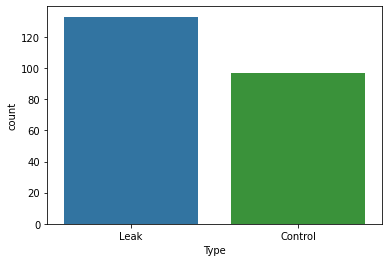

Leak       133
Control     97
Name: Type, dtype: int64


In [6]:
sns.countplot(data=Data, x="Type",palette={"Leak":"tab:blue","Control":"tab:green","Clog":"tab:orange"})
plt.show()
s = df['Type'].value_counts()
print(s)

In [8]:
predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']

# Histogramm, Boxplots, and Scatterplots with a regression lines

In [9]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

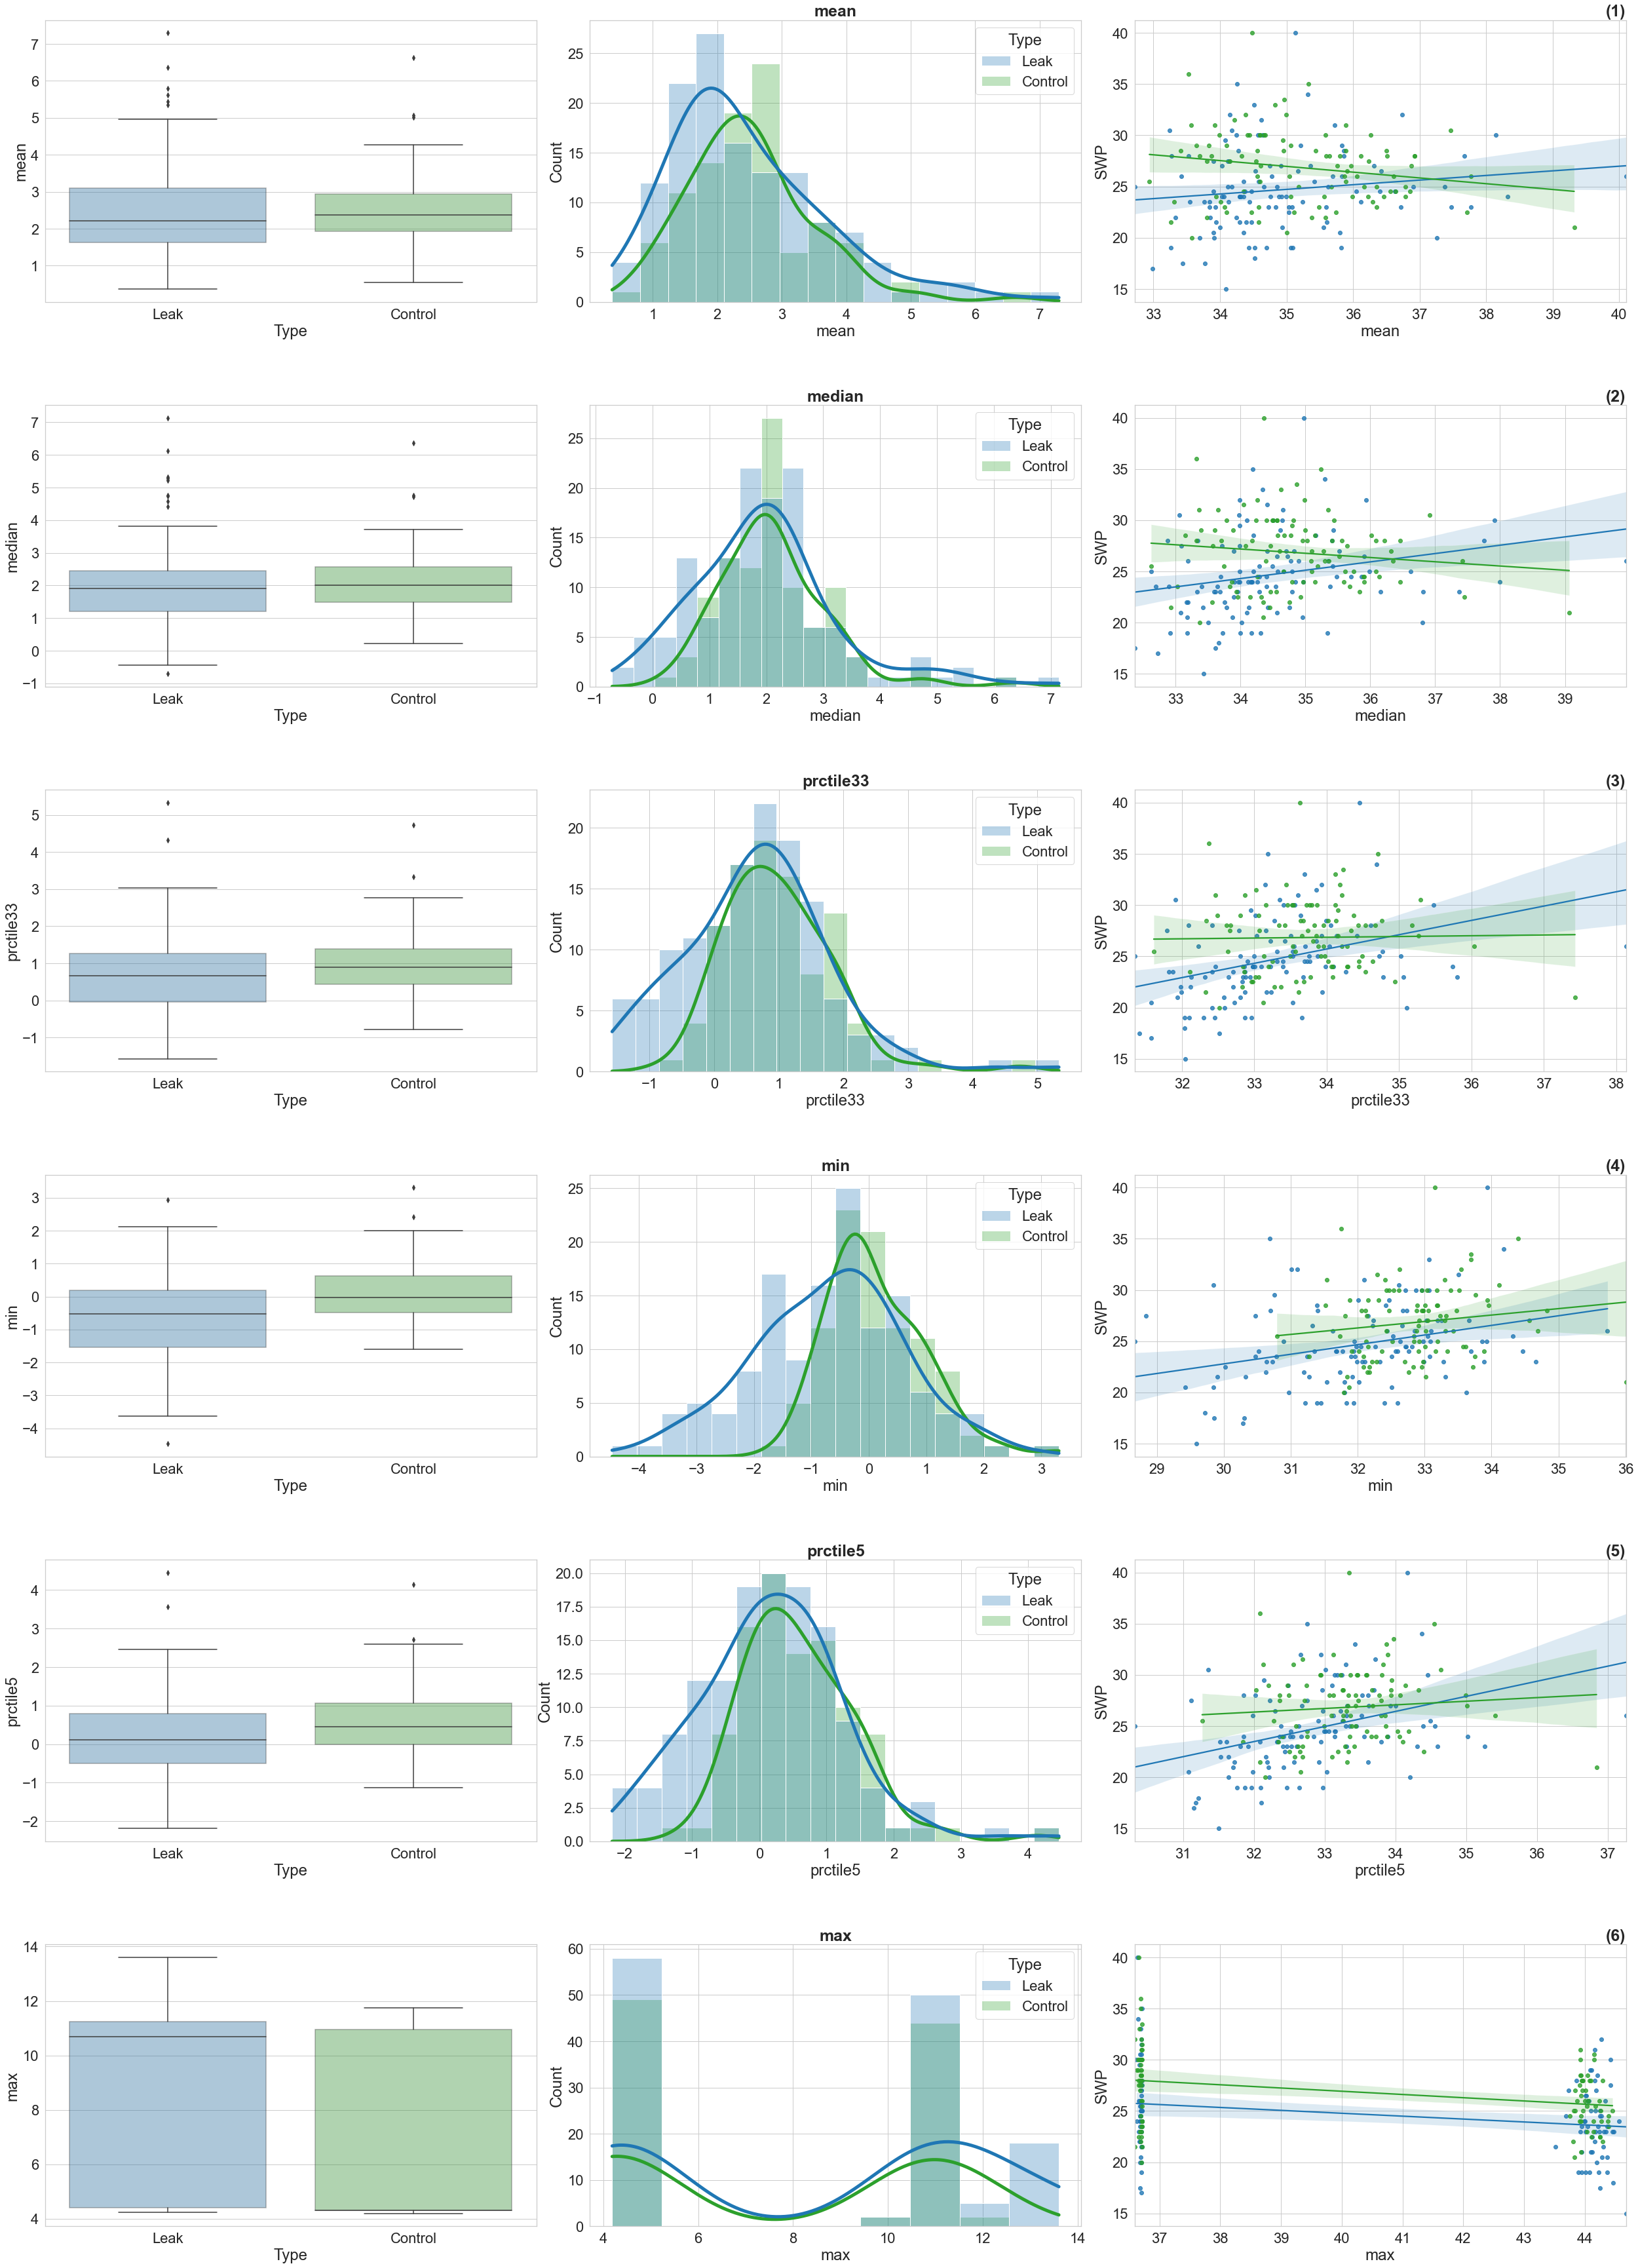

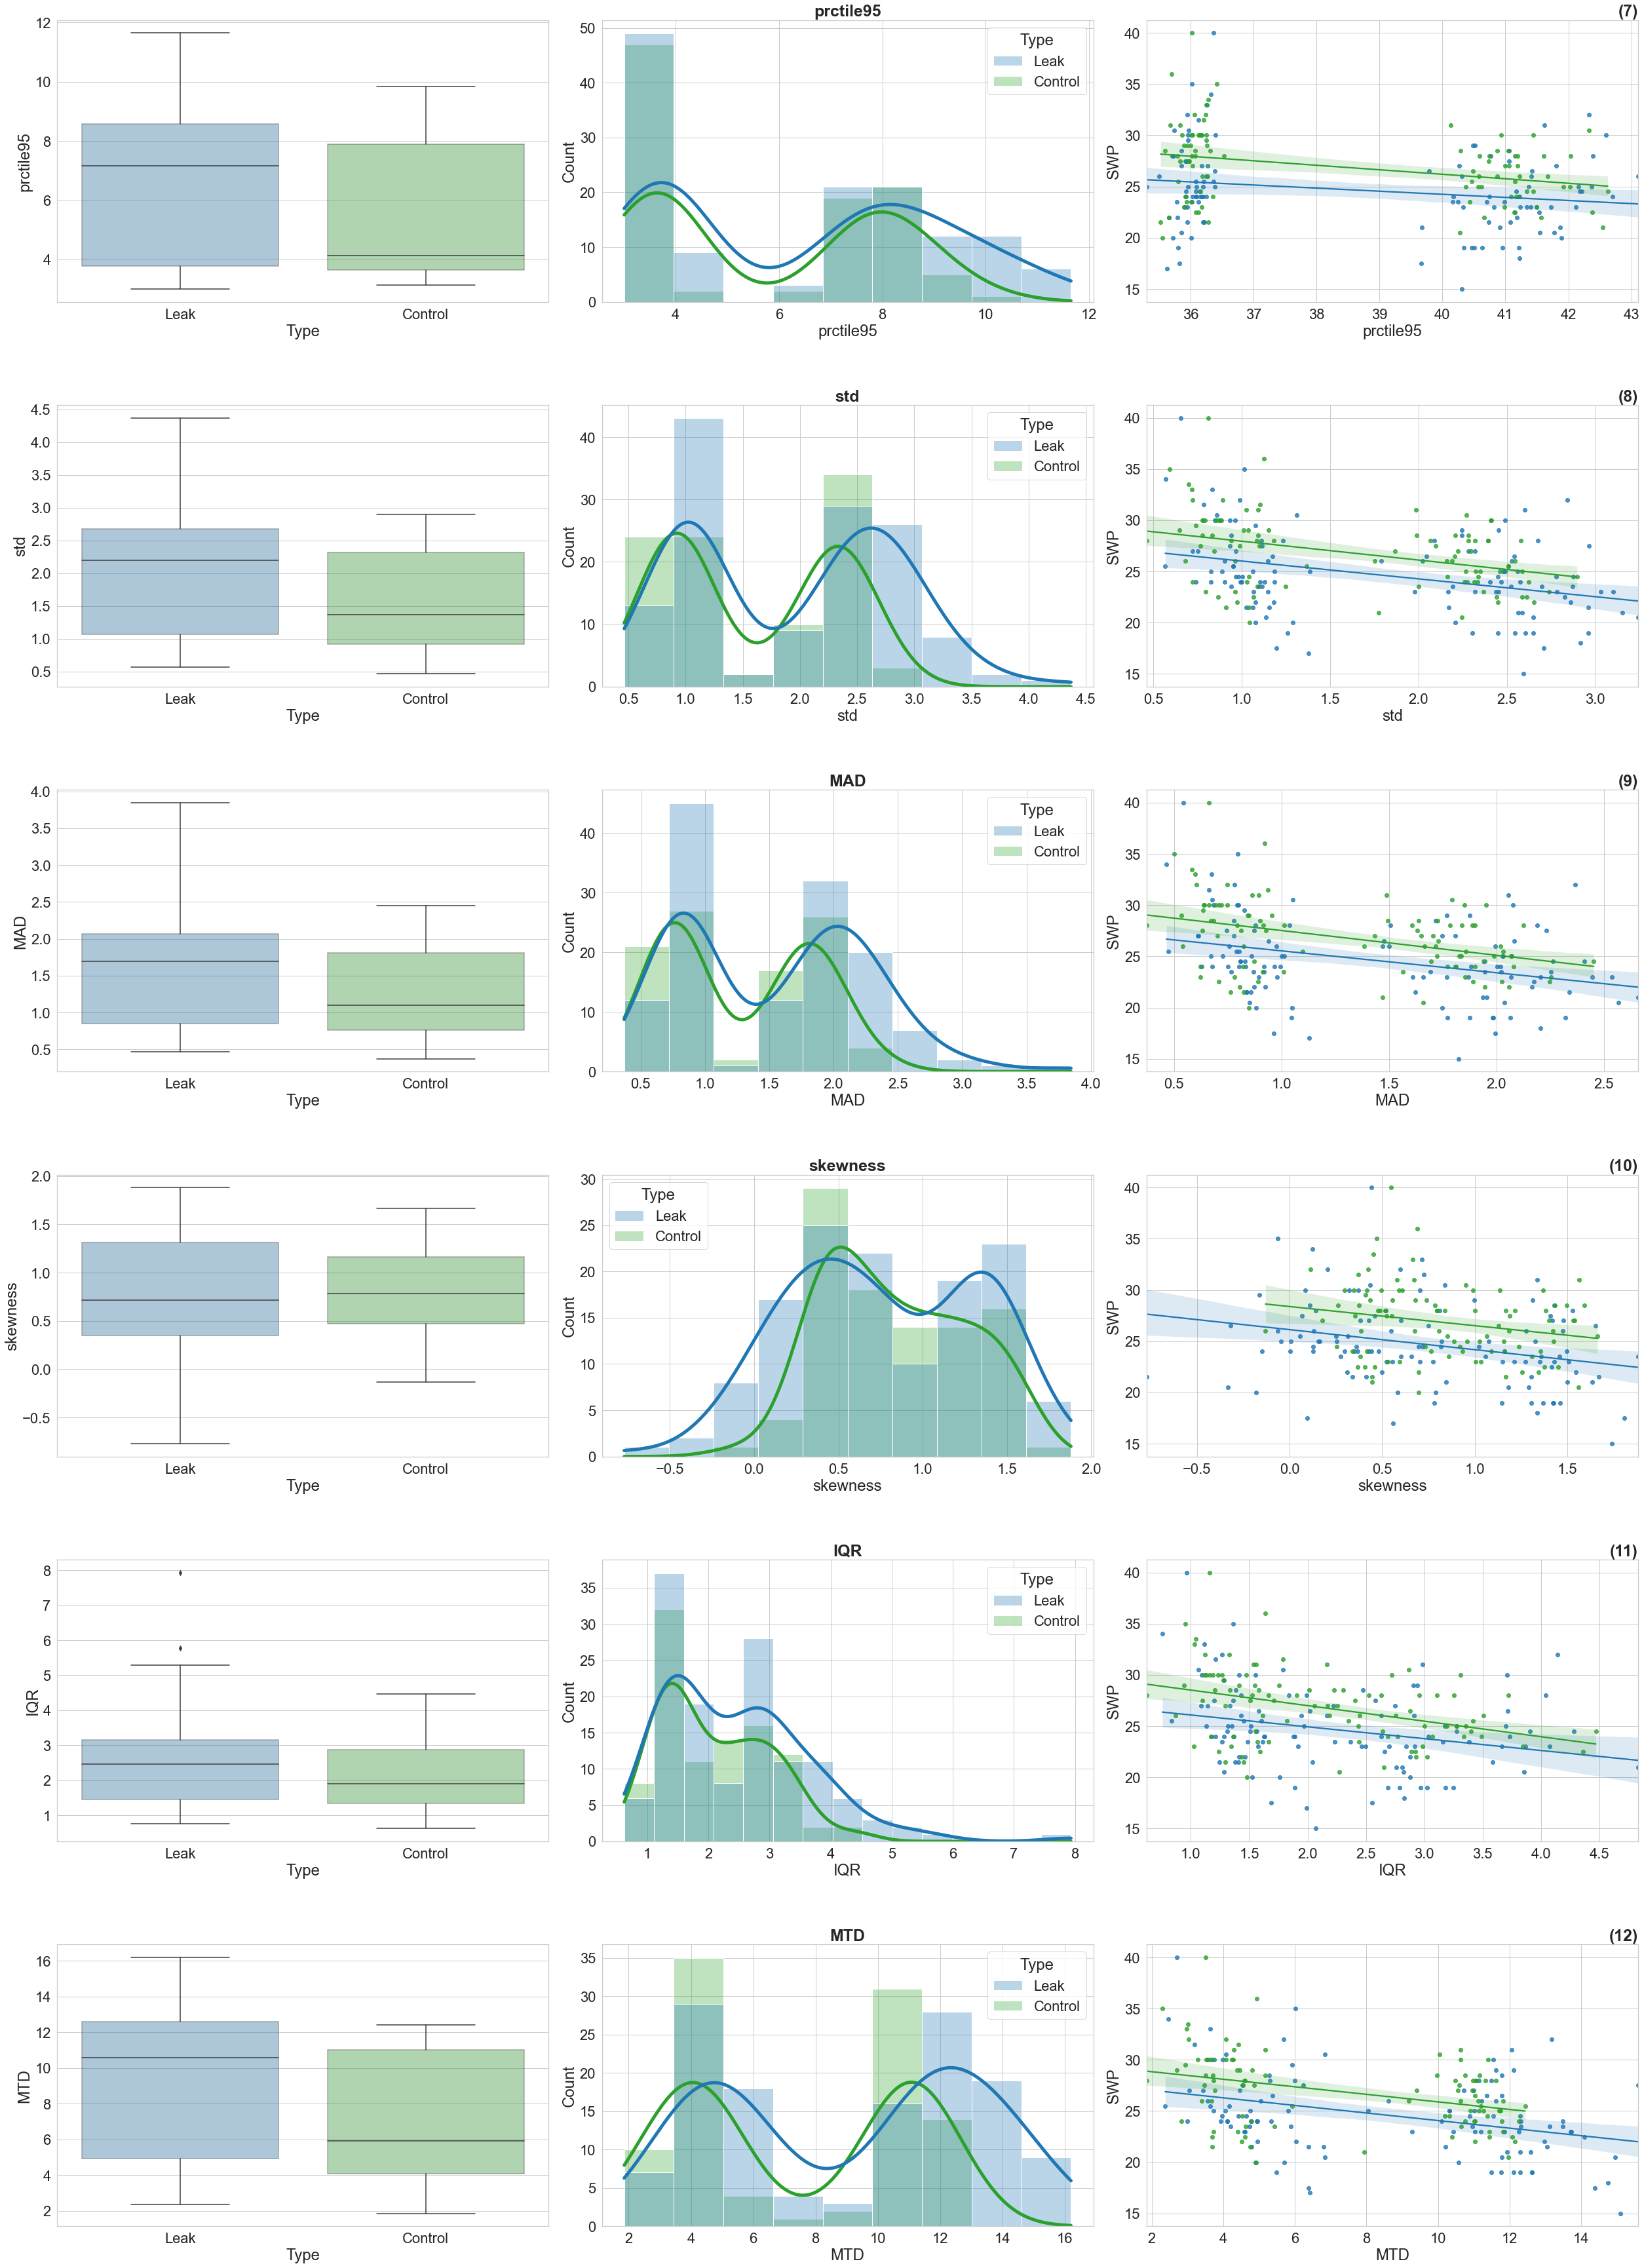

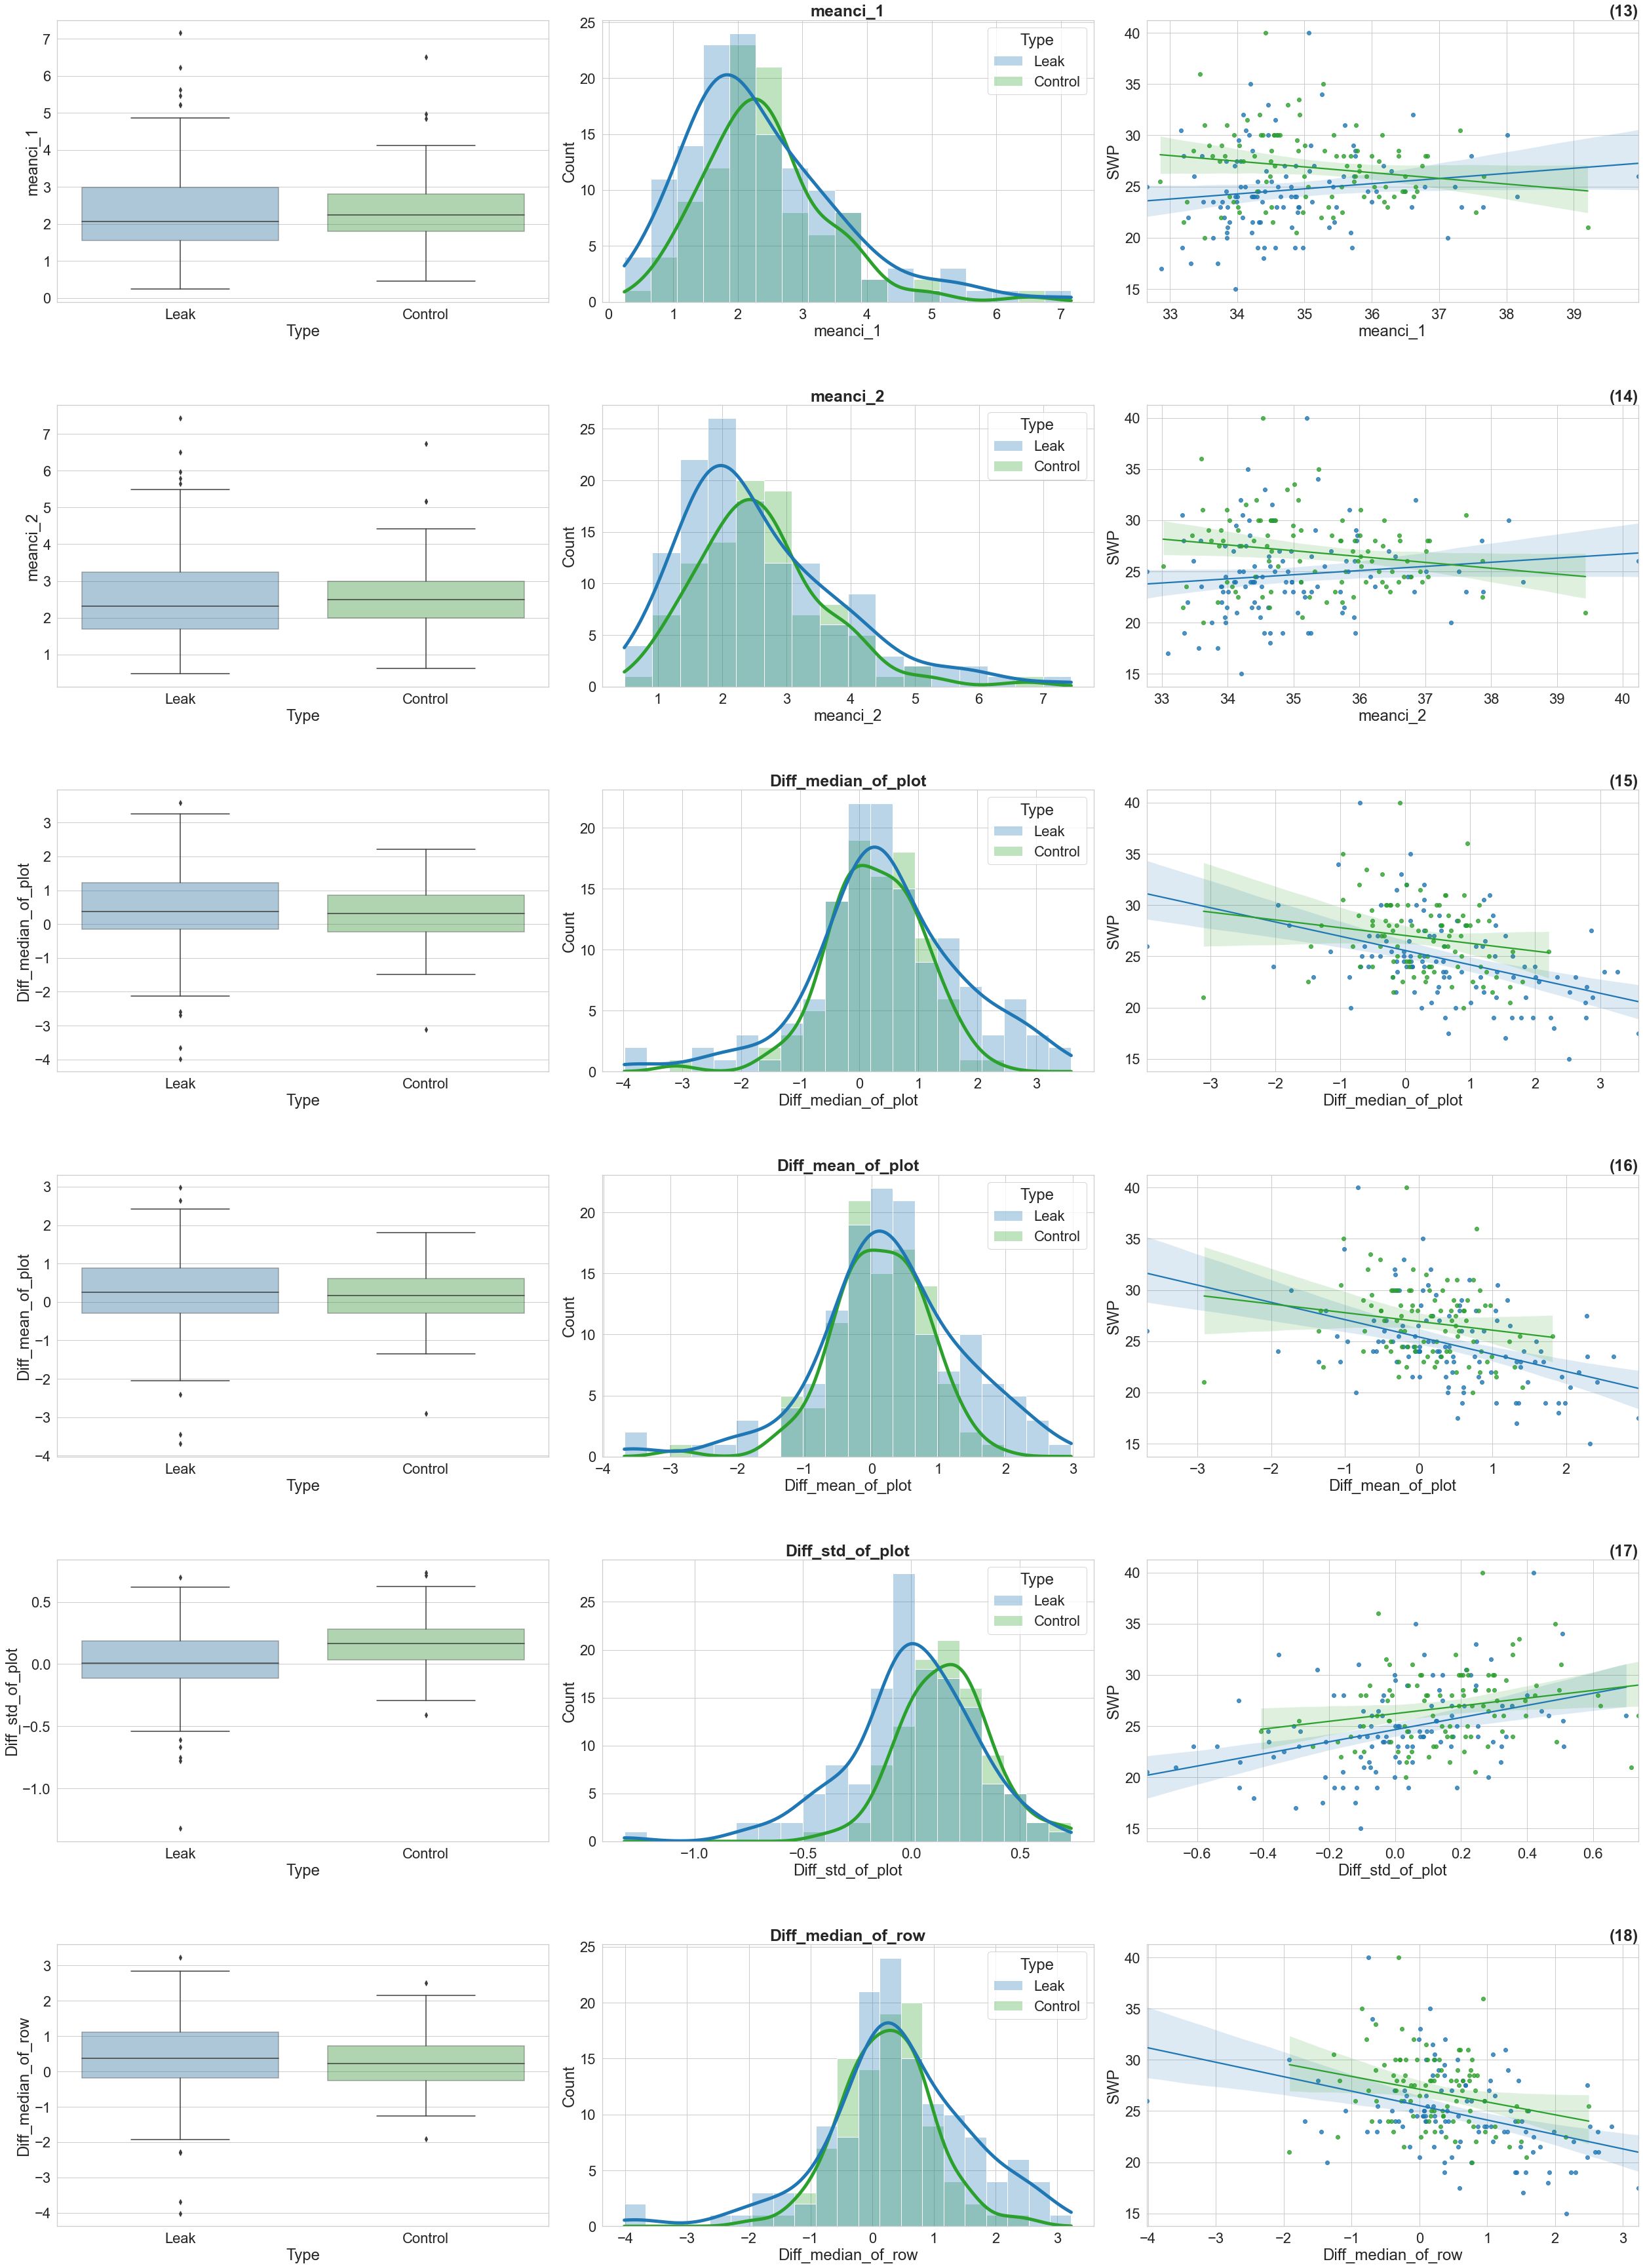

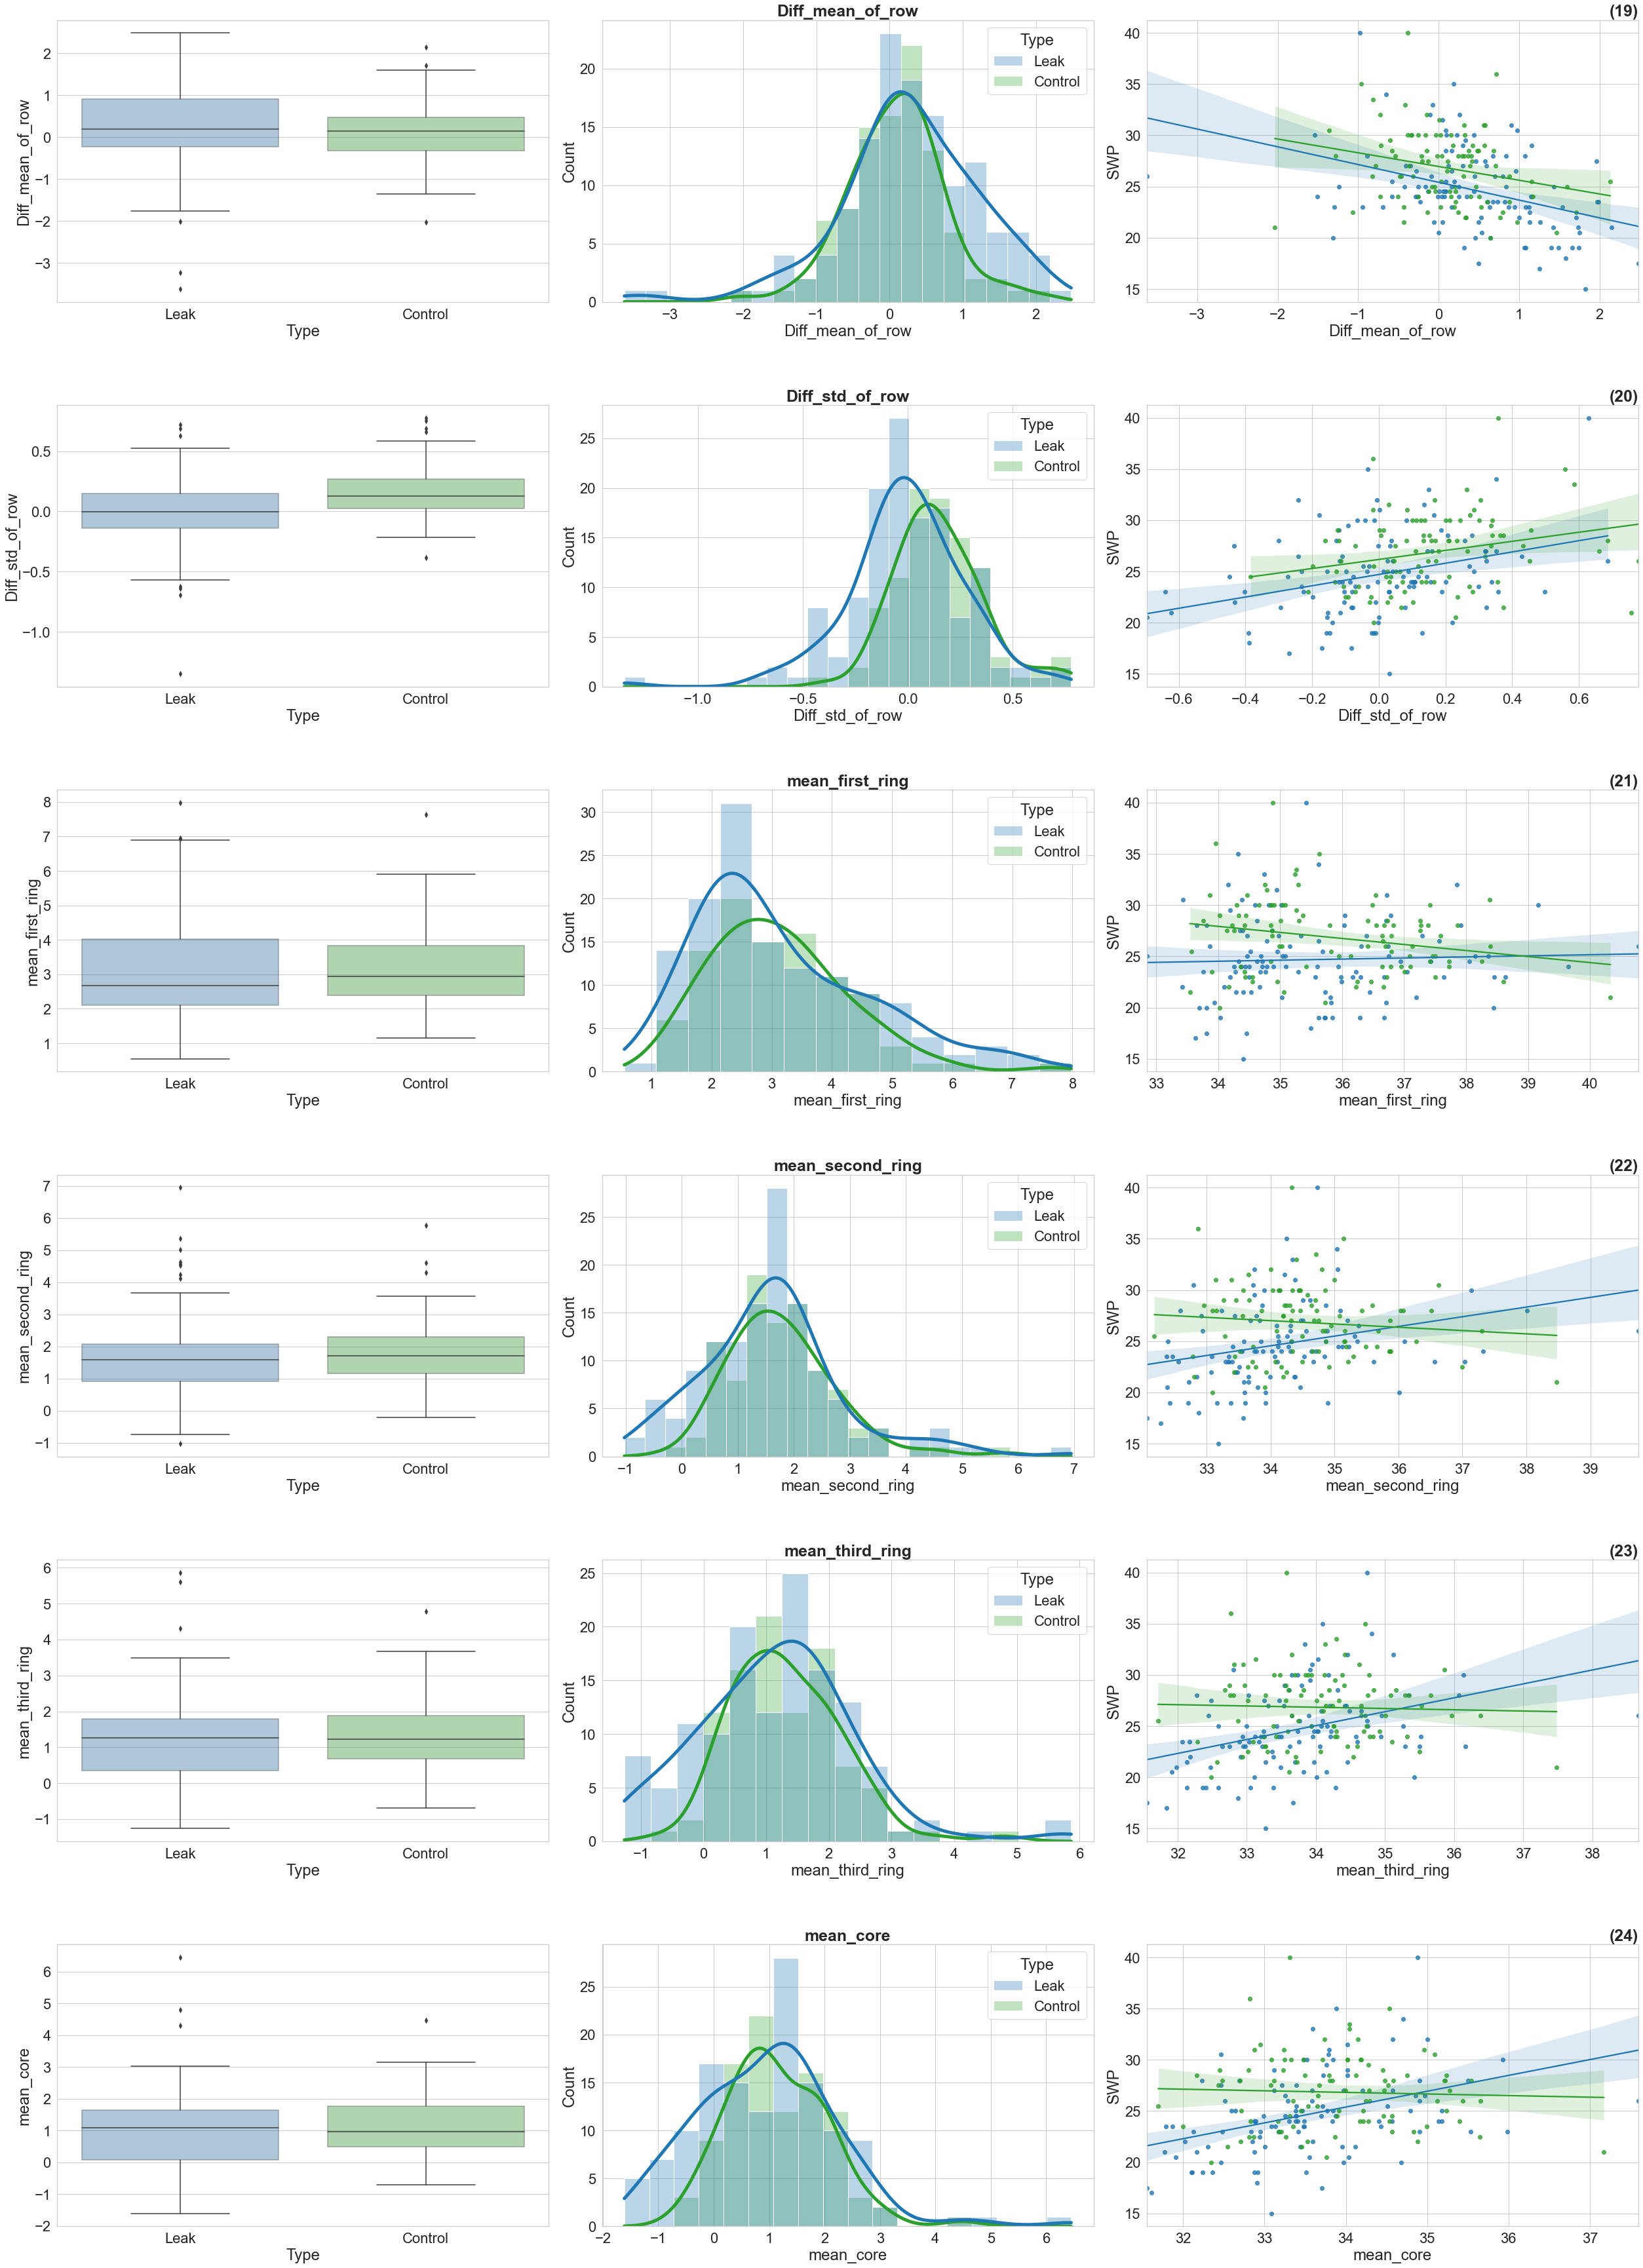

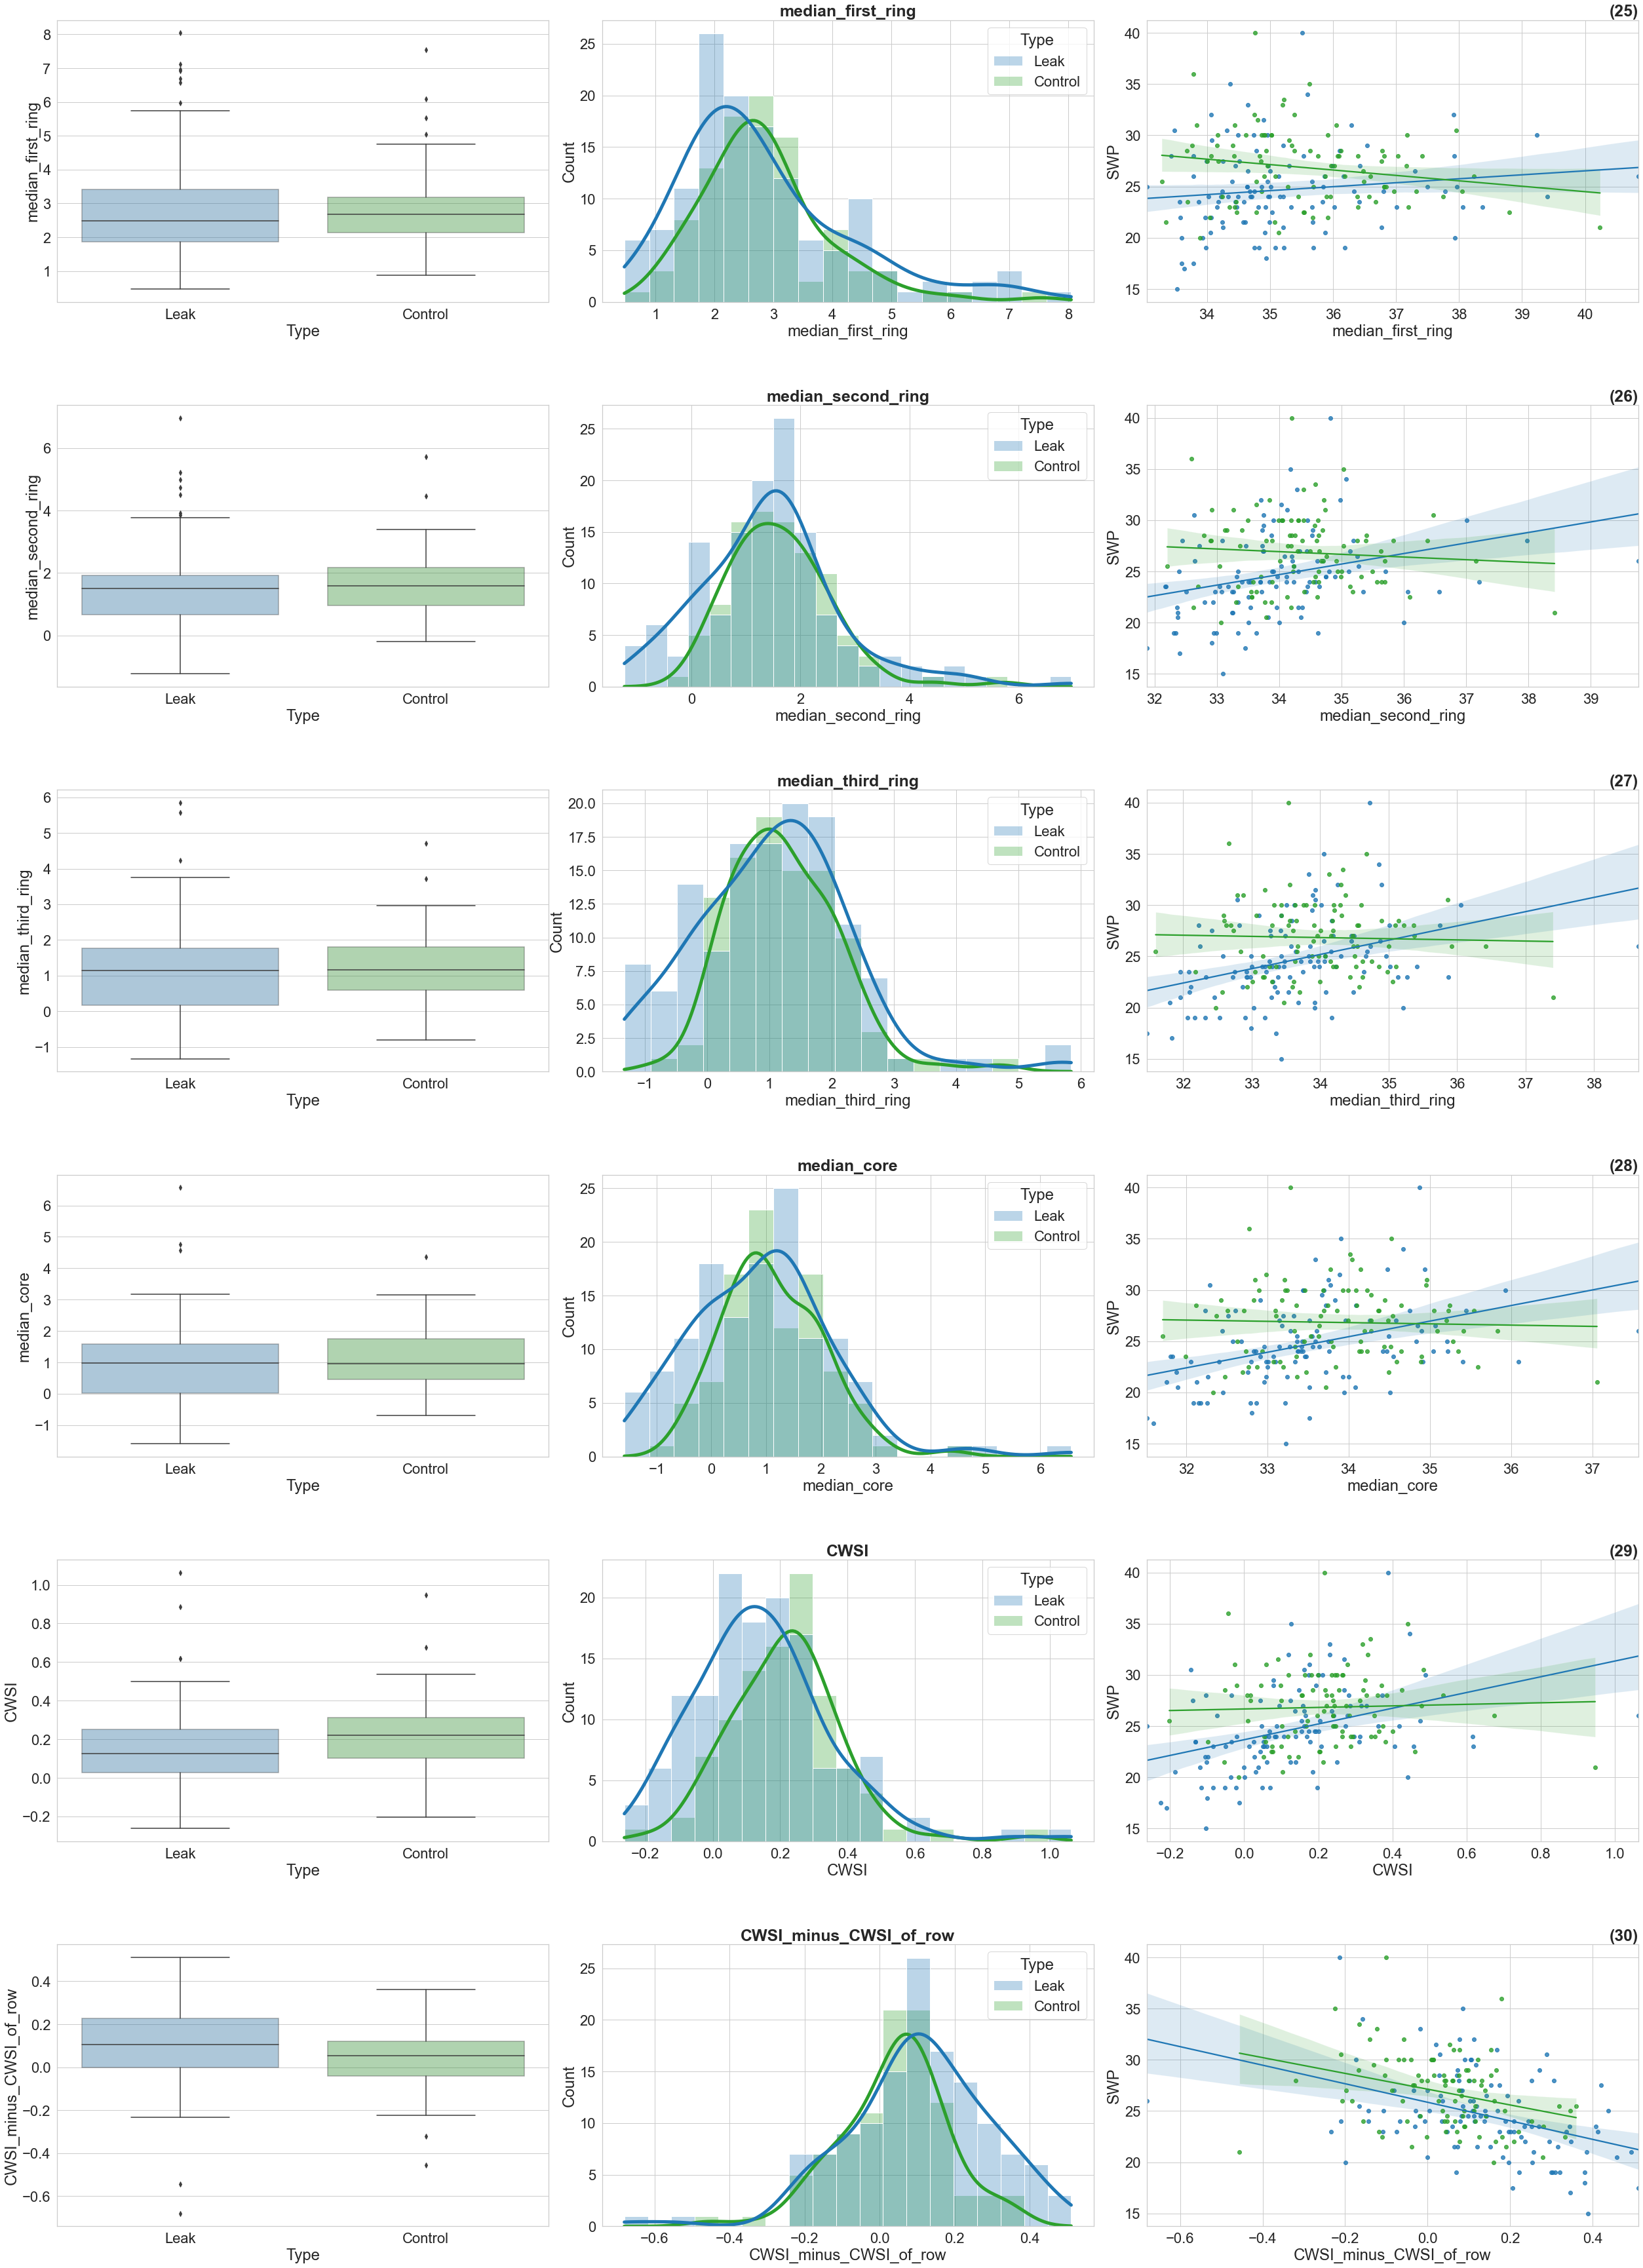

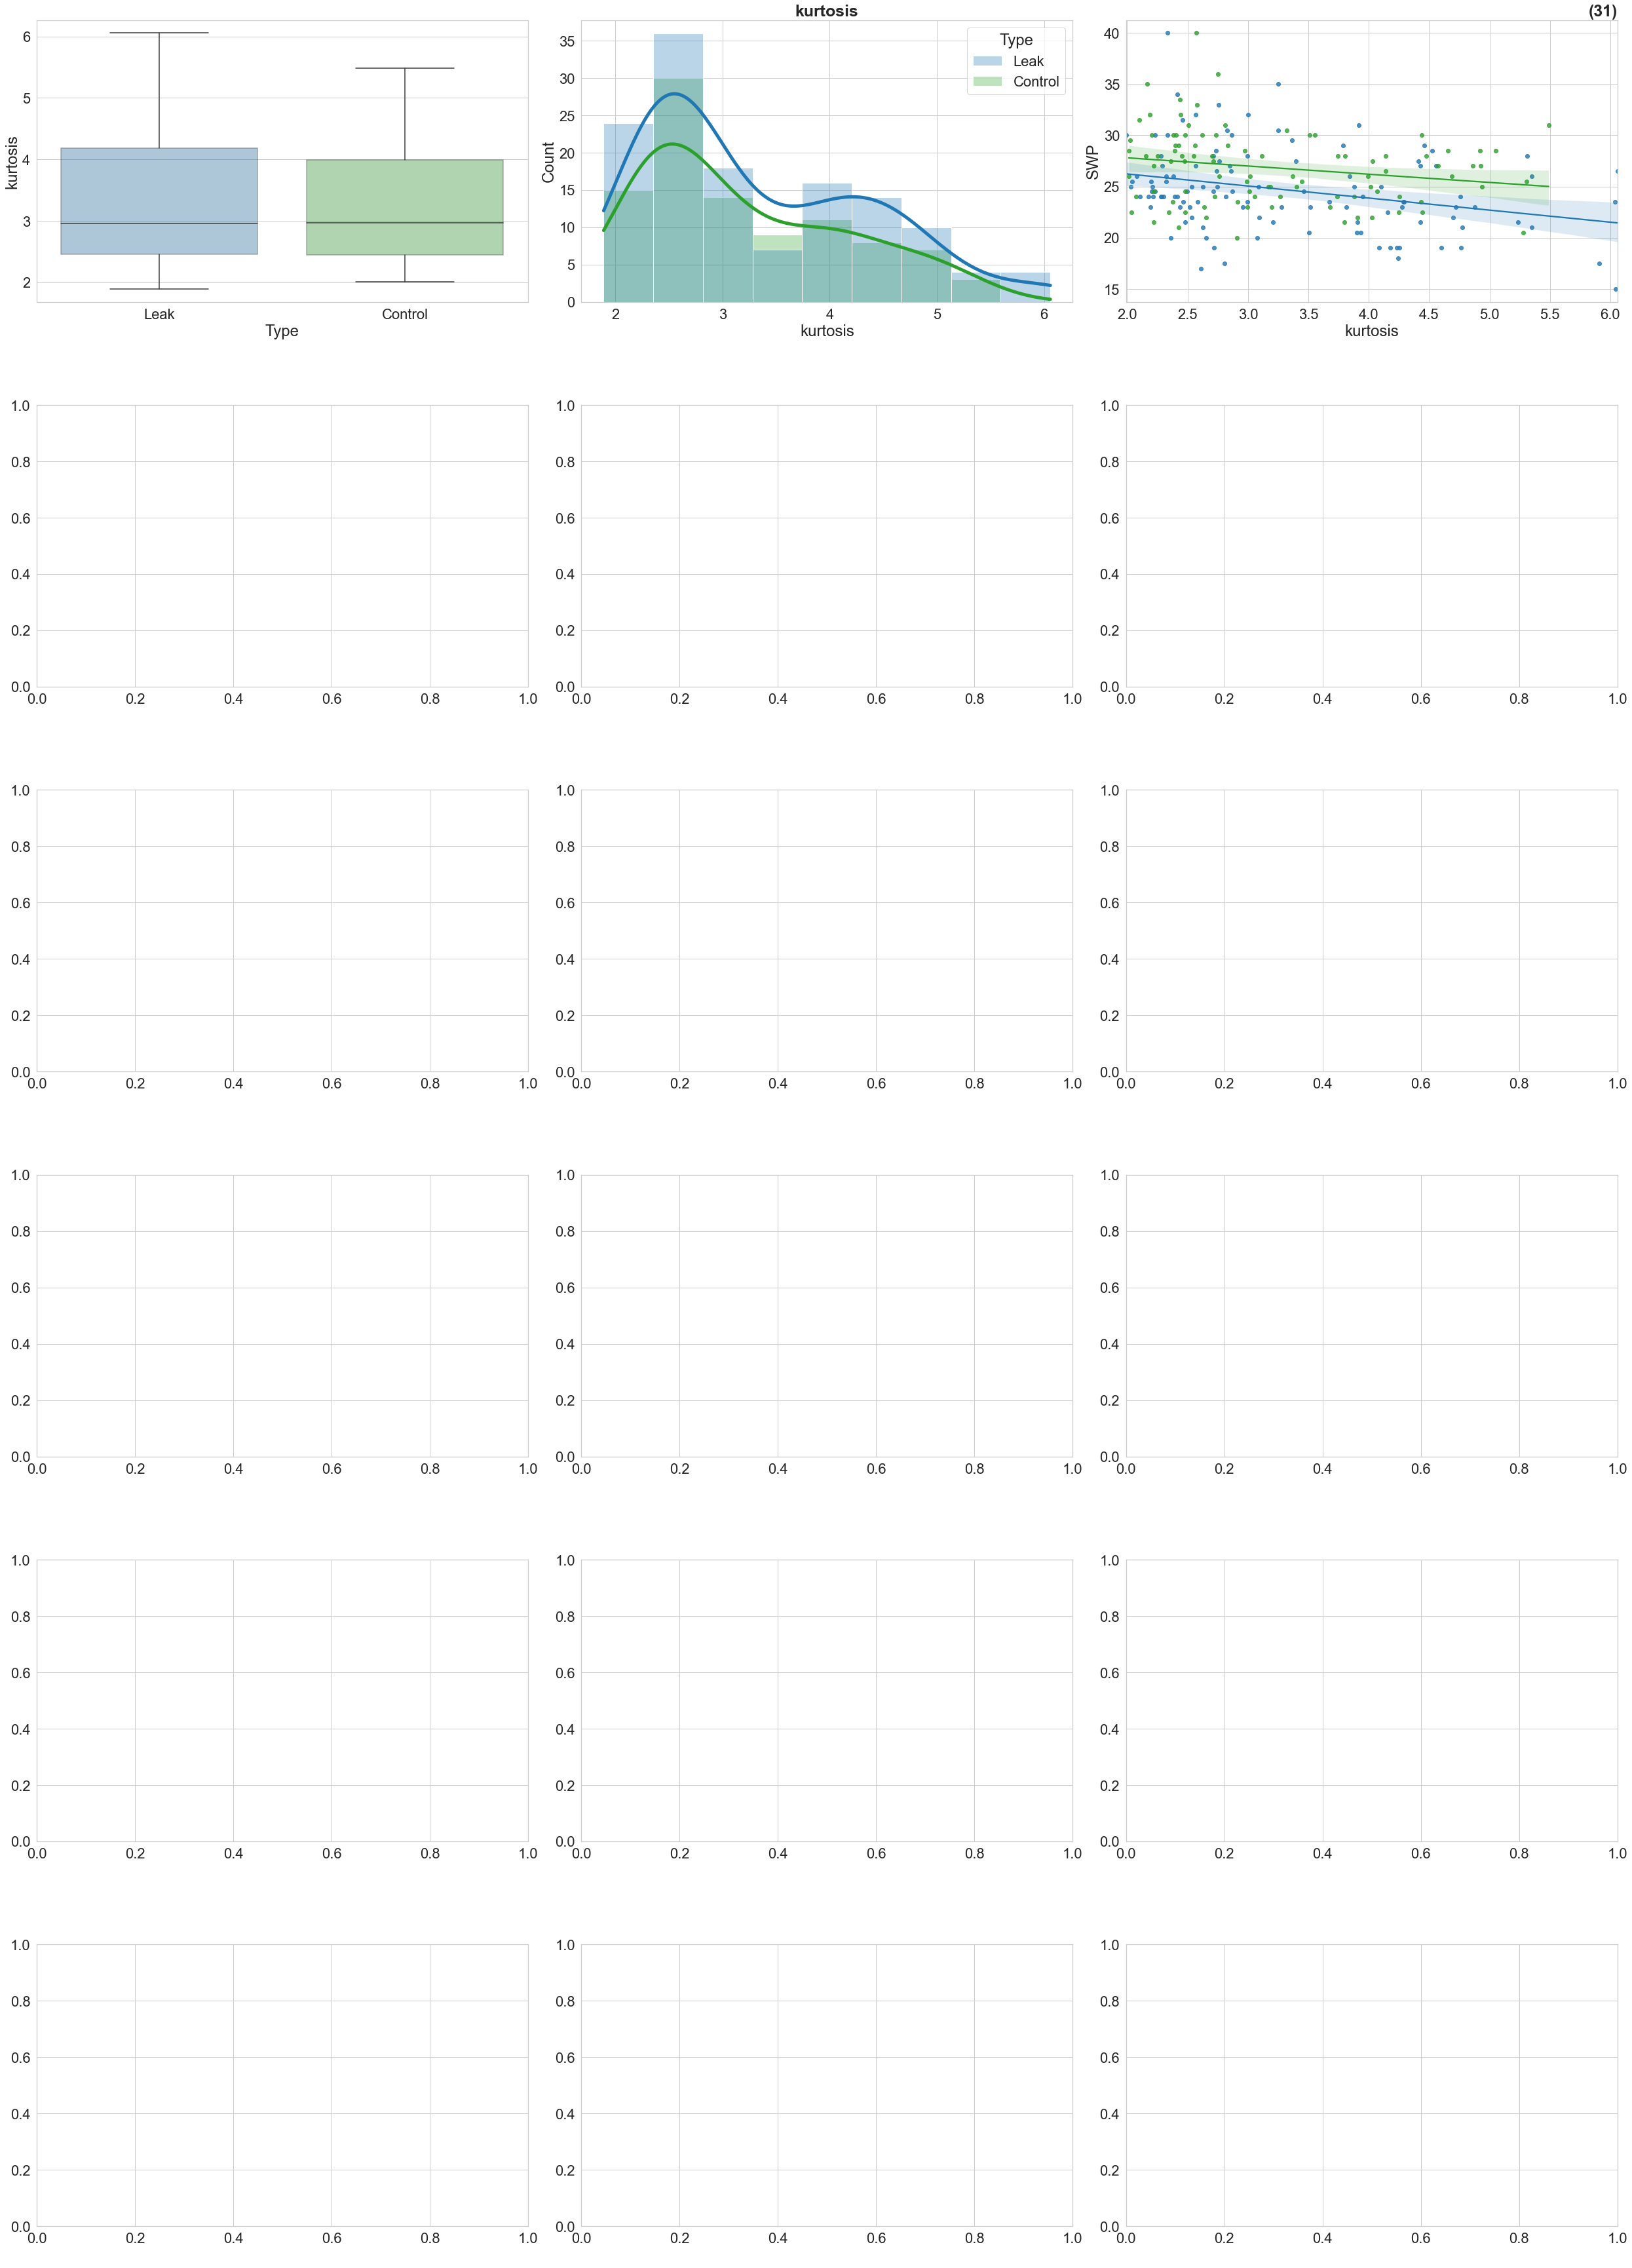

In [10]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
import math
rows_in_fig = 6
a=rows_in_fig #len(predictors)
b=3
c=1
var_number =1
palette={"Leak":"tab:blue","Control":"tab:green"} 
# fig = plt.figure(figsize=(30,a*8))
fig, axes = plt.subplots(a,b,figsize=(35,a*8))
fig.tight_layout(h_pad=5)

for i in Data[predictors]:
    plt.xlabel(' ')
    sns.boxplot(x="Type", y=i, data=Data,palette=palette,boxprops=dict(alpha=.4),ax=axes[c-1,0])
    
#     plt.title("\n %s" % i, fontsize=25,fontweight="bold")
    plt.xlabel(' ')
    sns.histplot(Data, x=i, hue="Type",hue_order=["Leak","Control"],kde=True,legend= True,palette=palette,alpha=.3,
                 line_kws=dict(linewidth=5),ax=axes[c-1,1])
    axes[c-1,1].set_title(i, fontsize=25,fontweight="bold")

    plt.xlabel(' ')
#     plt.title("(%s)" % (math.ceil(c/3)+iteret), fontsize=25,fontweight="bold",loc='right')
    hue_regplot(data=df, x=i, y='SWP', hue='Type',palette=palette, ax=axes[c-1,2])
    axes[c-1,2].set_title("(%s)" % var_number,fontsize=25,fontweight="bold",loc='right')

#     sns.scatterplot(data = df, x = i, y = 'SWP', hue = 'Type',palette=palette,alpha=.8,legend= False)
#     sns.displot(df, x=i, hue="Type",hue_order=["Leak","Clog","Control"],  kind="kde",fill=True,legend= False)
    c=c+1
    var_number = var_number+1
    if c==rows_in_fig+1:
        plt.show()
        fig, axes = plt.subplots(a,b,figsize=(35,a*8))
        fig.tight_layout(h_pad=5)
        c = 1
plt.show()
    

# Outliers

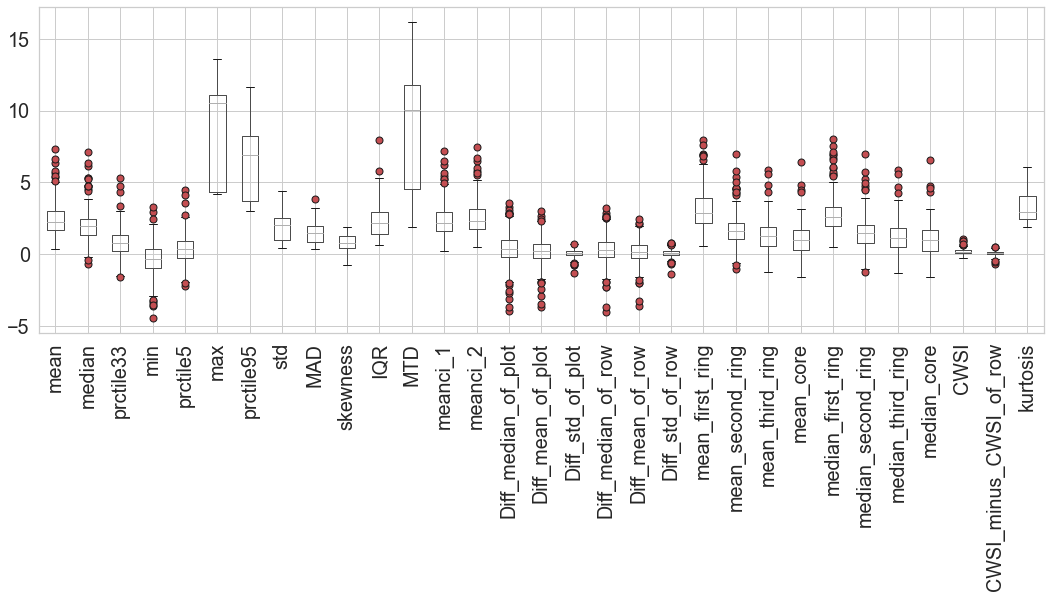

In [11]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")

df_to_exclude_outliers=Data[predictors].copy(True)
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k');
df_to_exclude_outliers.boxplot(figsize=(18,6),flierprops=flierprops) ;
plt.xticks(rotation=90);

In [25]:
import collections
df_without_outliters=Data.copy(True)
outlieres = []
for i in predictors: 
    Q1 = np.quantile(Data[i],0.25)
    Q3 = np.quantile(Data[i],0.75)
    IQR = Q3 - Q1
    lower, upper = Q1-1.5*IQR, Q3+1.5*IQR
    outlieres.append(df_without_outliters[df_without_outliters[i] < lower].index)
    outlieres.append(df_without_outliters[df_without_outliters[i] > upper].index)

flat_list = [item for sublist in outlieres for item in sublist]
Counter = collections.Counter(flat_list)
outlieres_to_drop={x: count for x, count in Counter.items() if count >= 2}
print('indices to drop:',outlieres_to_drop.keys())
print('indices to drop:',len(outlieres_to_drop.keys()))

df_without_outliters = df_without_outliters.drop(outlieres_to_drop.keys())
df_without_outliters.to_excel("data_Lavi_without_outlires.xlsx") 

indices to drop: dict_keys([0, 1, 2, 6, 9, 10, 14, 15, 214, 229, 4, 17, 30, 109, 222, 225, 226, 227, 3, 213, 164, 221, 223, 224, 228, 218])
indices to drop: 26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  204 non-null    int64  
 1   Plot_All_Plots_Data     204 non-null    object 
 2   mean                    204 non-null    float64
 3   min                     204 non-null    float64
 4   prctile5                204 non-null    float64
 5   max                     204 non-null    float64
 6   prctile95               204 non-null    float64
 7   std                     204 non-null    float64
 8   MTD                     204 non-null    float64
 9   median                  204 non-null    float64
 10  skewness                204 non-null    float64
 11  kurtosis                204 non-null    float64
 12  IQR                     204 non-null    float64
 13  MAD                     204 non-null    float64
 14  meanci_1                204 non-null    fl

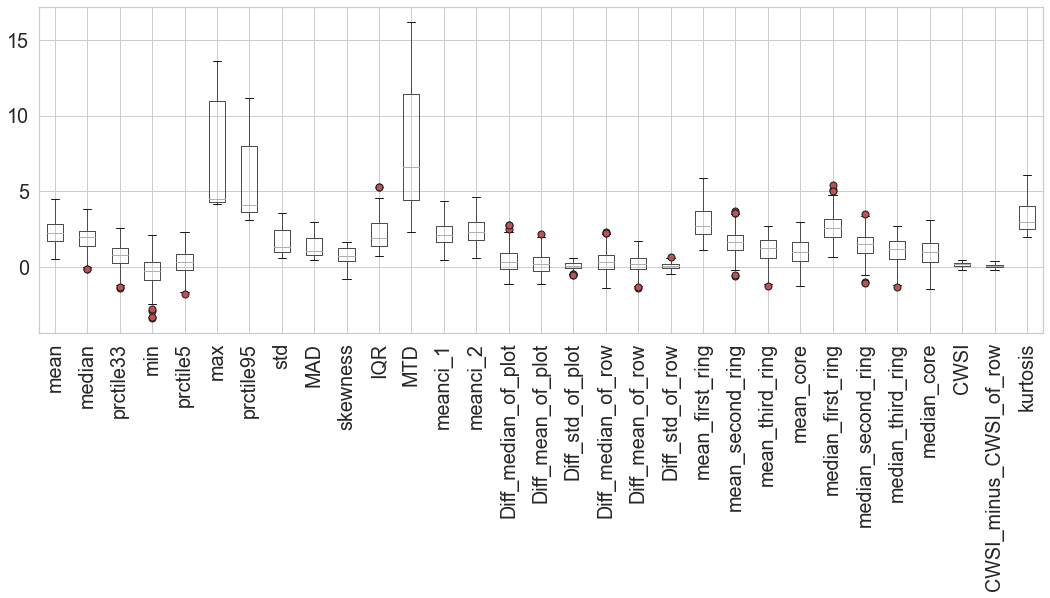

In [26]:
df_out = pd.read_excel(os.path.join(os.getcwd(), 'data_Lavi_without_outlires.xlsx')).iloc[: , 1:]
# df_out1.dropna(how='any')
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k')
df_out[predictors].boxplot(figsize=(18,6),flierprops=flierprops) 
plt.xticks(rotation=90)
df_out.info()

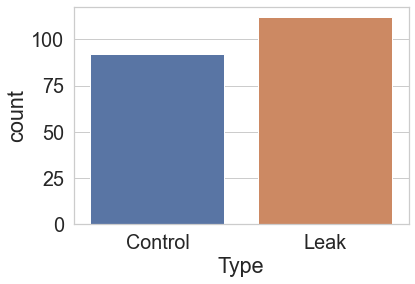

Leak       112
Control     92
Name: Type, dtype: int64


In [27]:
sns.countplot(data=df_out, x="Type")
plt.show()
s = df_out['Type'].value_counts()
print(s)

# correlation

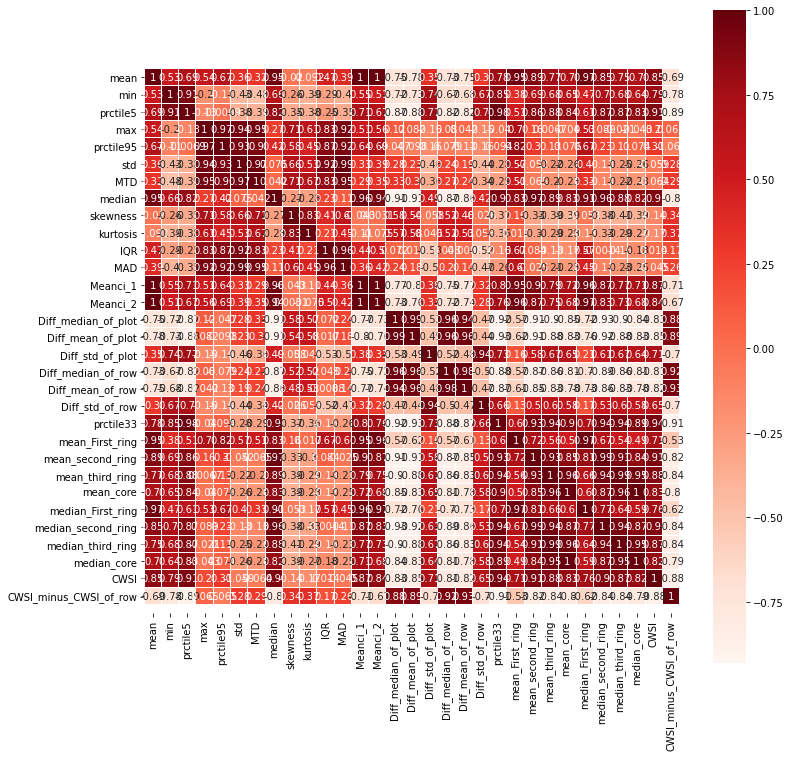

In [49]:
fix,ax = plt.subplots(figsize=(12,12))
Data_x= Data.drop(Exclude_vars,axis=1)
sns.heatmap(Data_x.corr(method='pearson'),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Partial correlation

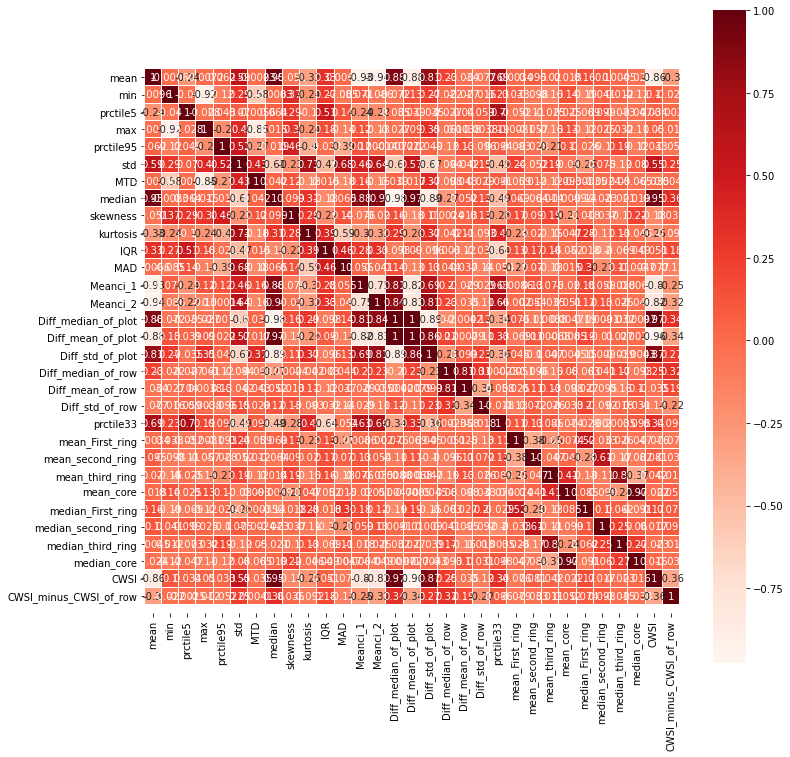

In [50]:
import pingouin as pg
fix,ax = plt.subplots(figsize=(12,12))
sns.heatmap(Data_x.pcorr(),vmax=1,linewidths=0.01,
           square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Correlated features

# Spearman Correlation

In [51]:
Data.loc[Data.Type == 'Clog', 'Y'] = 0
Data.loc[Data.Type == 'Control', 'Y'] = 1
Data.loc[Data.Type == 'Leak', 'Y'] = 2

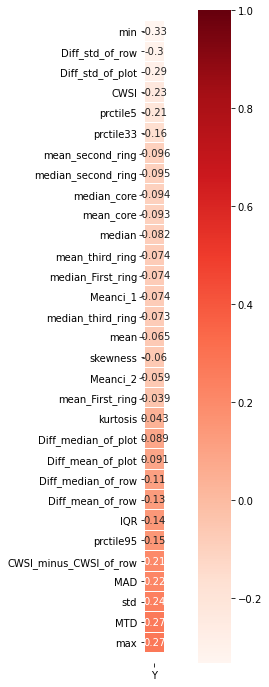

In [52]:
fix,ax = plt.subplots(figsize=(12,12))
sns.heatmap(Data.drop('RTK_Num_All_Plots_Data',axis=1).corr(method='spearman').drop(['mean', 'min', 'prctile5', 'max',
                                               'prctile95', 'std', 'MTD', 'median',
                                               'skewness', 'kurtosis', 'IQR', 'MAD',
                                               'Meanci_1', 'Meanci_2','Diff_median_of_plot',
                                               'Diff_std_of_plot', 'CWSI', 'Diff_median_of_row',
                                               'Diff_mean_of_row', 'Diff_std_of_row',
                                               'Diff_mean_of_plot','prctile33',
                                               'mean_First_ring','mean_second_ring',
                                               'mean_third_ring','mean_core','median_First_ring',
                                               'median_second_ring','median_third_ring',
                                               'median_core','CWSI','CWSI_minus_CWSI_of_row'], axis=1)
            .sort_values(by=['Y'])
            .drop(['Y'], axis=0),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

## partial Spearman Correlation

In [53]:
Exclude_vars = ['Type','RTK_Num_All_Plots_Data','Plot_All_Plots_Data','Y']
All_spearman_pcorr = pd.DataFrame()
for i in Data.drop(Exclude_vars, axis=1).columns:
    spearman_pcorr = pg.partial_corr(data = Data,x=i,y= 'Y', method = 'spearman')
    spearman_pcorr['X'] = i
    All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
All_spearman_pcorr = All_spearman_pcorr.reset_index().drop(['index'], axis=1)
All_spearman_pcorr['r_abs']=All_spearman_pcorr.r.abs()
All_spearman_pcorr['p-val']<=0.05#
All_spearman_pcorr.sort_values(by=['r_abs'])


n         r           CI95%         p-val                       X  \
21  230 -0.039184   [-0.17, 0.09]  5.543533e-01         mean_First_ring   
9   230  0.042632   [-0.09, 0.17]  5.200185e-01                kurtosis   
13  230 -0.059473   [-0.19, 0.07]  3.692767e-01                Meanci_2   
8   230 -0.059605   [-0.19, 0.07]  3.682084e-01                skewness   
0   230 -0.065175   [-0.19, 0.06]  3.250743e-01                    mean   
27  230 -0.072600    [-0.2, 0.06]  2.728648e-01       median_third_ring   
25  230 -0.073661    [-0.2, 0.06]  2.659000e-01       median_First_ring   
12  230 -0.073661    [-0.2, 0.06]  2.659000e-01                Meanci_1   
23  230 -0.073926    [-0.2, 0.06]  2.641779e-01         mean_third_ring   
7   230 -0.082015   [-0.21, 0.05]  2.152953e-01                  median   
14  230  0.088513   [-0.04, 0.22]  1.810016e-01     Diff_median_of_plot   
15  230  0.090502   [-0.04, 0.22]  1.713558e-01       Diff_mean_of_plot   
24  230 -0.092756   [-0.22, 0.04]  1.608921e-01               mean_core   
28  230 -0.094480   [-0.22, 0.04]  1.532197e-01             median_core   
26  230 -0.095010   [-0.22, 0.03]  1.509155e-01      median_second_ring   
22  230 -0.096204   [-0.22, 0.03]  1.458270e-01        mean_second_ring   
17  230  0.112382   [-0.02, 0.24]  8.904537e-02      Diff_median_of_row   
18  230  0.128824    [-0.0, 0.25]  5.103189e-02        Diff_mean_of_row   
10  230  0.143278    [0.01, 0.27]  2.983289e-02                     IQR   
4   230  0.149245    [0.02, 0.27]  2.358773e-02               prctile95   
20  230 -0.157069  [-0.28, -0.03]  1.713001e-02               prctile33   
2   230 -0.206663  [-0.33, -0.08]  1.625978e-03                prctile5   
30  230  0.208121    [0.08, 0.33]  1.503819e-03  CWSI_minus_CWSI_of_row   
11  230  0.216741    [0.09, 0.34]  9.378372e-04                     MAD   
29  230 -0.228277   [-0.35, -0.1]  4.842593e-04                    CWSI   
5   230  0.243526    [0.12, 0.36]  1.919048e-04                     std   
6   230  0.268589    [0.14, 0.38]  3.671345e-05                     MTD   
3   230  0.272434    [0.15, 0.39]  2.806087e-05                     max   
16  230 -0.292722  [-0.41, -0.17]  6.348299e-06        Diff_std_of_plot   
19  230 -0.302005  [-0.42, -0.18]  3.092956e-06         Diff_std_of_row   
1   230 -0.331443  [-0.44, -0.21]  2.669976e-07                     min   

       r_abs  
21  0.039184  
9   0.042632  
13  0.059473  
8   0.059605  
0   0.065175  
27  0.072600  
25  0.073661  
12  0.073661  
23  0.073926  
7   0.082015  
14  0.088513  
15  0.090502  
24  0.092756  
28  0.094480  
26  0.095010  
22  0.096204  
17  0.112382  
18  0.128824  
10  0.143278  
4   0.149245  
20  0.157069  
2   0.206663  
30  0.208121  
11  0.216741  
29  0.228277  
5   0.243526  
6   0.268589  
3   0.272434  
16  0.292722  
19  0.302005  
1   0.331443

In [54]:
corr = Data_x.pcorr()
corr_triu = corr.stack()
filterd = corr_triu[0.7<corr_triu]
filterd[filterd<1]

mean                 median                 0.952322
                     Diff_median_of_plot    0.884645
                     Diff_std_of_plot       0.805927
prctile5             prctile33              0.701891
std                  kurtosis               0.727697
median               mean                   0.952322
                     Meanci_1               0.875890
                     Meanci_2               0.902964
                     Diff_mean_of_plot      0.971314
                     CWSI                   0.949849
kurtosis             std                    0.727697
Meanci_1             median                 0.875890
                     Diff_median_of_plot    0.814881
Meanci_2             median                 0.902964
                     Diff_median_of_plot    0.837614
                     Diff_std_of_plot       0.811671
Diff_median_of_plot  mean                   0.884645
                     Meanci_1               0.814881
                     Meanci_2               0.

### Elimination of highly correlated features that were less correlat with Y

In [55]:
DataNew = Data.drop(['mean','MAD','Diff_mean_of_plot',
                     'Diff_median_of_row','mean_First_ring',
                     'mean_second_ring','mean_third_ring',
                     'mean_core','kurtosis','max'], axis=1).copy(True)
DataNew

RTK_Num_All_Plots_Data Plot_All_Plots_Data       min  prctile5  \
0                        13                   A  2.932175  4.457136   
1                        78                   A  1.961736  3.569195   
2                         3                   A  3.307075  4.142067   
3                       236                   G  2.424114  2.590158   
4                        14                   A  1.859919  2.466482   
..                      ...                 ...       ...       ...   
225                     100                   A -4.465857 -2.189168   
226                     266                   G -3.633389 -1.985322   
227                     102                   A -3.578330 -1.926274   
228                       2                   A -0.678220 -0.495110   
229                     111                   A -2.942310 -1.620148   

     prctile95       std        MTD    median  skewness       IQR  ...  \
0    10.306432  1.788961   8.609290  7.138833  0.131822  2.629451  ...   
1     9.512432  1.880624   8.860369  6.122231  0.201418  2.796598  ...   
2     9.844344  1.773802   7.928481  6.365640  0.445650  2.650822  ...   
3     4.130879  0.462569   1.857778  3.166763  0.515223  0.621101  ...   
4     8.924536  1.978285   9.267117  4.571752  0.774317  2.695999  ...   
..         ...       ...        ...       ...       ...       ...  ...   
225   7.753122  2.963390  15.588860 -0.210096  1.408474  2.581360  ...   
226   3.002665  1.384949   8.038850  0.322053  0.005875  1.348604  ...   
227   8.549368  3.242046  14.944658  0.184800  1.179075  3.856838  ...   
228   9.172387  3.154419  11.926907  1.859851  0.843327  4.831014  ...   
229   6.859465  2.708969  14.390430 -0.431243  1.804878  2.552004  ...   

     Diff_std_of_row  prctile33  median_First_ring  median_second_ring  \
0           0.686924   5.334603           8.044336            6.967126   
1           0.721635   4.329517           6.931722            5.210271   
2           0.756759   4.731364           7.536722            5.721649   
3           0.687112   2.774347           3.367126            2.991489   
4           0.497600   3.007226           5.566602            3.774675   
..               ...        ...                ...                 ...   
225        -0.435268  -1.510295           0.694546           -0.581970   
226        -0.098621  -0.954463           0.748013            0.092744   
227        -0.695920  -1.423170           1.924344           -0.626750   
228        -0.623859  -0.122398           4.066429            0.543311   
229        -0.082306  -1.387539           0.795393           -0.922659   

     median_third_ring  median_core      CWSI  CWSI_minus_CWSI_of_row  \
0             5.848612     4.767618  1.064159               -0.680541   
1             5.577190     6.569216  0.886651               -0.543425   
2             4.700425     4.358395  0.947483               -0.456019   
3             2.962074     3.142137  0.537787               -0.320373   
4             3.077085     2.603203  0.617892               -0.234274   
..                 ...          ...       ...                     ...   
225          -0.879609    -0.785037 -0.139117                0.420282   
226           0.277859     0.275095 -0.262820                0.438217   
227          -1.197327    -1.105037 -0.186135                0.459219   
228          -0.248196    -0.569928 -0.001405                0.492869   
229          -1.331420    -1.283501 -0.224790                0.510936   

        Type    Y  
0       Leak  2.0  
1       Leak  2.0  
2    Control  1.0  
3    Control  1.0  
4       Leak  2.0  
..       ...  ...  
225     Leak  2.0  
226     Leak  2.0  
227     Leak  2.0  
228     Leak  2.0  
229     Leak  2.0  

[230 rows x 25 columns]

### Exmine VIF after feature elimination

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
X = DataNew.drop(Exclude_vars,axis=1)
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature           VIF
0                      min     33.965251
1                 prctile5    247.317622
2                prctile95   5490.155481
3                      std  13386.465842
4                      MTD   1432.783533
5                   median   3568.388272
6                 skewness     57.178805
7                      IQR   1709.344623
8                 Meanci_1  14612.945911
9                 Meanci_2  19179.088057
10     Diff_median_of_plot     37.323764
11        Diff_std_of_plot     37.962451
12        Diff_mean_of_row     55.623965
13         Diff_std_of_row     13.073017
14               prctile33   7550.263301
15       median_First_ring    354.034606
16      median_second_ring    169.415058
17       median_third_ring     68.563497
18             median_core     24.398736
19                    CWSI     36.690602
20  CWSI_minus_CWSI_of_row     56.134257


# Outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   min                     230 non-null    float64
 1   prctile5                230 non-null    float64
 2   prctile95               230 non-null    float64
 3   std                     230 non-null    float64
 4   MTD                     230 non-null    float64
 5   median                  230 non-null    float64
 6   skewness                230 non-null    float64
 7   IQR                     230 non-null    float64
 8   Meanci_1                230 non-null    float64
 9   Meanci_2                230 non-null    float64
 10  Diff_median_of_plot     230 non-null    float64
 11  Diff_std_of_plot        230 non-null    float64
 12  Diff_mean_of_row        230 non-null    float64
 13  Diff_std_of_row         230 non-null    float64
 14  prctile33               230 non-null    fl

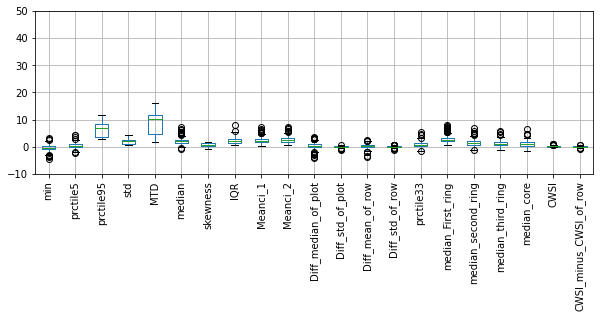

In [57]:
df3=DataNew.drop('Y', axis=1).copy()
df4=DataNew.drop(Exclude_vars, axis=1)


df4.boxplot(figsize=(10,3)) 
plt.ylim(-10, 50)
plt.xticks(rotation=90)
df4.info()

In [58]:
df_outliters=df3
for i in df4.columns: 
    Q1 = np.quantile(df3[i],0.25)
    Q3 = np.quantile(df3[i],0.75)
    IQR = Q3 - Q1
    lower, upper = Q1-2*IQR, Q3+2*IQR
    df_outliters = df_outliters.drop(df_outliters[df_outliters[i] < lower].index)
    df_outliters = df_outliters.drop(df_outliters[df_outliters[i] > upper].index)
df_outliters.to_excel("data_Lavi_without_outlires.xlsx") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  216 non-null    int64  
 1   Plot_All_Plots_Data     216 non-null    object 
 2   min                     216 non-null    float64
 3   prctile5                216 non-null    float64
 4   prctile95               216 non-null    float64
 5   std                     216 non-null    float64
 6   MTD                     216 non-null    float64
 7   median                  216 non-null    float64
 8   skewness                216 non-null    float64
 9   IQR                     216 non-null    float64
 10  Meanci_1                216 non-null    float64
 11  Meanci_2                216 non-null    float64
 12  Diff_median_of_plot     216 non-null    float64
 13  Diff_std_of_plot        216 non-null    float64
 14  Diff_mean_of_row        216 non-null    fl

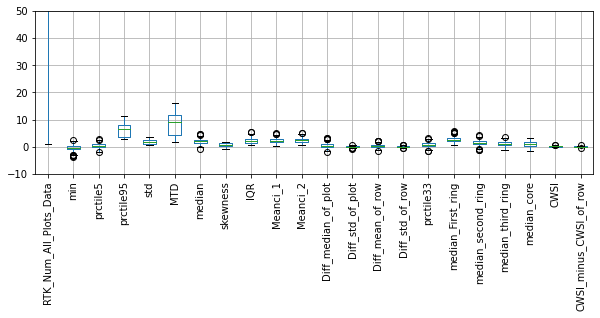

In [59]:
df_out = pd.read_excel(os.path.join(os.getcwd(), 'data_Lavi_without_outlires.xlsx'))
df_out1=df_out.drop(['Type'], axis=1)
df_out1 = df_out1.iloc[: , 1:]
df_out1.dropna(how='any')
df_out1.boxplot(figsize=(10,3)) 
plt.ylim(-10, 50)
plt.xticks(rotation=90)
df_out1.info()

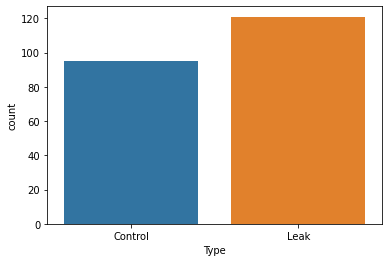

Leak       121
Control     95
Name: Type, dtype: int64


In [60]:
sns.countplot(data=df_out, x="Type")
plt.show()
s = df_out['Type'].value_counts()
print(s)

In [61]:
df_out.head(5)

Unnamed: 0  RTK_Num_All_Plots_Data Plot_All_Plots_Data       min  prctile5  \
0           3                     236                   G  2.424114  2.590158   
1           4                      14                   A  1.859919  2.466482   
2           5                     237                   G  1.996309  2.153483   
3           7                     218                   G  1.538782  1.772915   
4           8                      66                   A  0.913867  1.444201   

   prctile95       std        MTD    median  skewness  ...  Diff_mean_of_row  \
0   4.130879  0.462569   1.857778  3.166763  0.515223  ...         -1.275677   
1   8.924536  1.978285   9.267117  4.571752  0.774317  ...         -1.292092   
2   4.016075  0.590810   2.295044  2.839404  0.470617  ...         -0.964791   
3   3.963276  0.657272   2.695513  2.575730  0.440120  ...         -0.979400   
4   9.122904  2.271988  10.044307  3.720135  0.949360  ...         -1.359424   

   Diff_std_of_row  prctile33  median_First_ring  median_second_ring  \
0         0.687112   2.774347           3.367126            2.991489   
1         0.497600   3.007226           5.566602            3.774675   
2         0.558871   2.310267           3.230210            2.636387   
3         0.629056   2.056574           3.114063            2.423534   
4         0.274137   2.099088           4.751240            3.275674   

   median_third_ring  median_core      CWSI  CWSI_minus_CWSI_of_row     Type  
0           2.962074     3.142137  0.537787               -0.320373  Control  
1           3.077085     2.603203  0.617892               -0.234274     Leak  
2           2.274785     2.124313  0.441409               -0.223995  Control  
3           2.326619     2.473616  0.388723               -0.213326     Leak  
4           2.665665     1.750349  0.483383               -0.210300  Control  

[5 rows x 25 columns]

C:\Users\noy\Anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


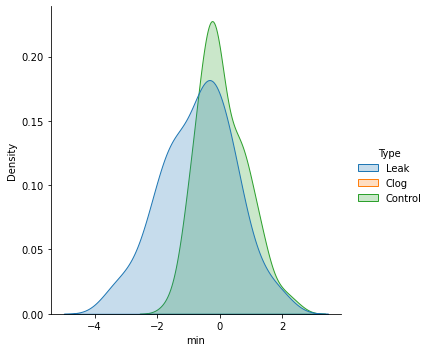

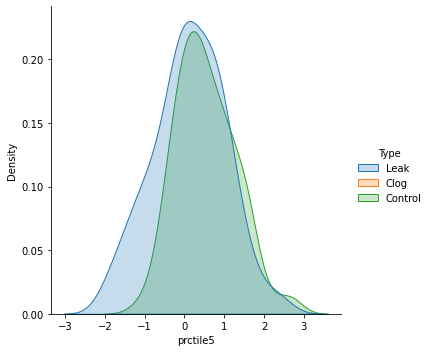

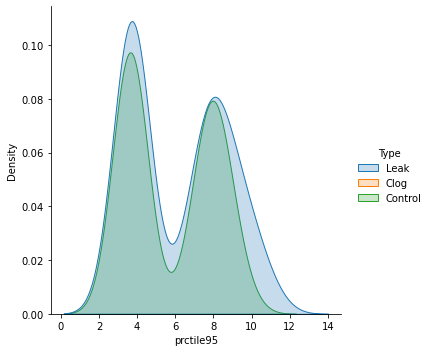

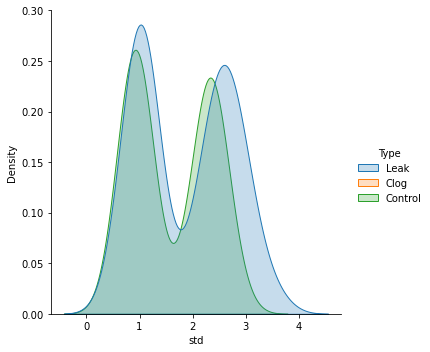

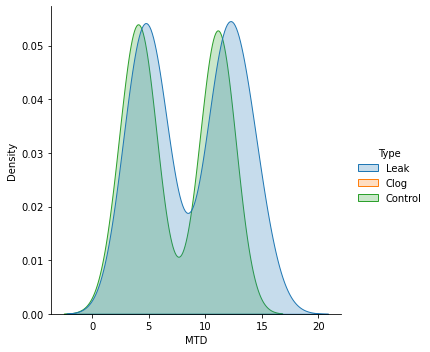

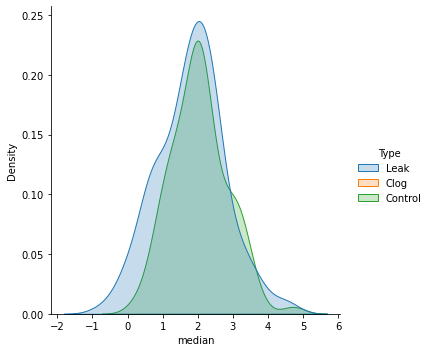

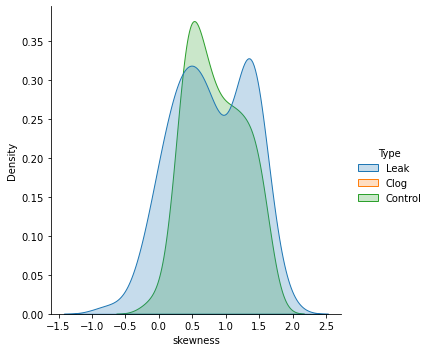

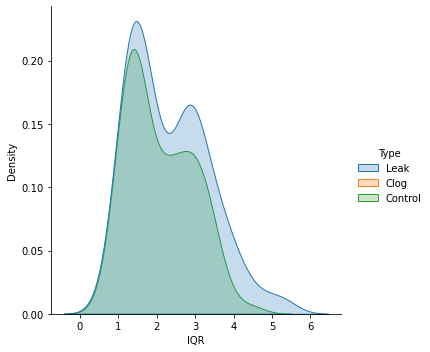

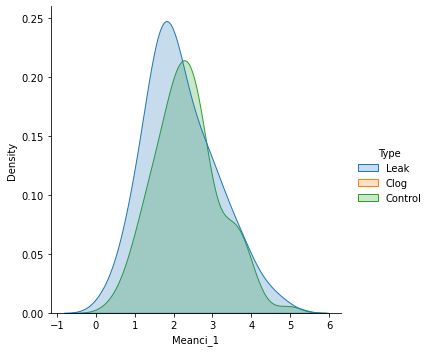

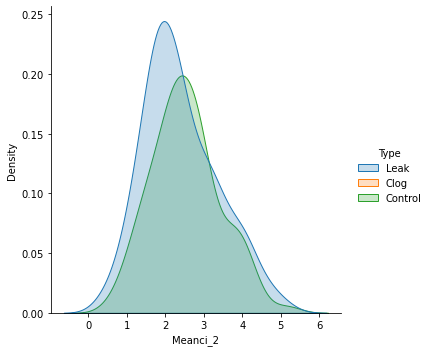

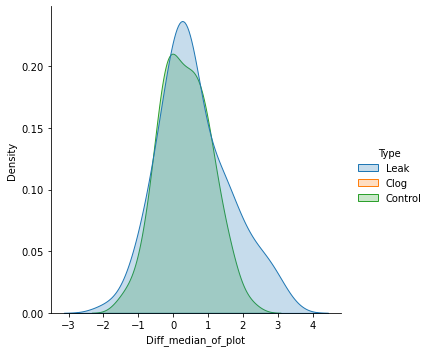

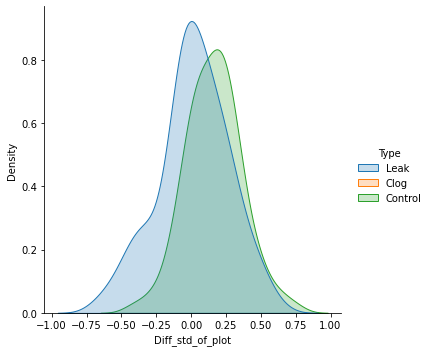

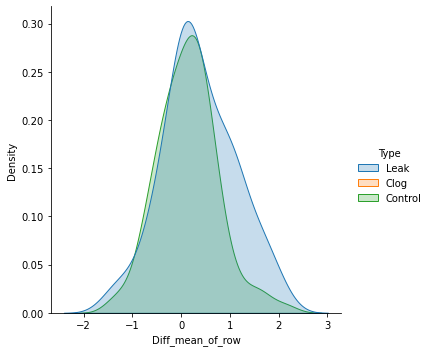

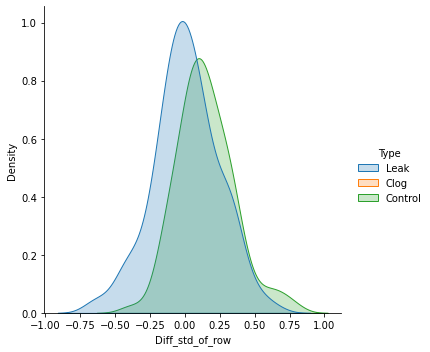

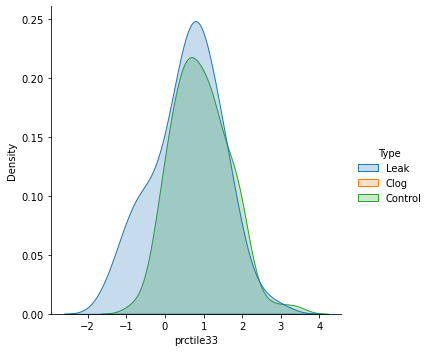

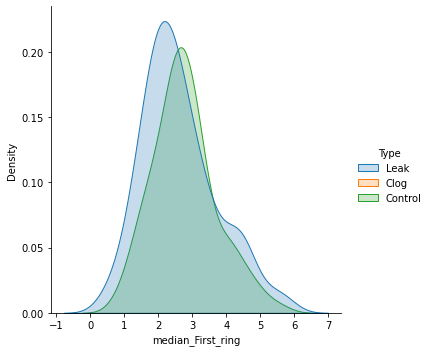

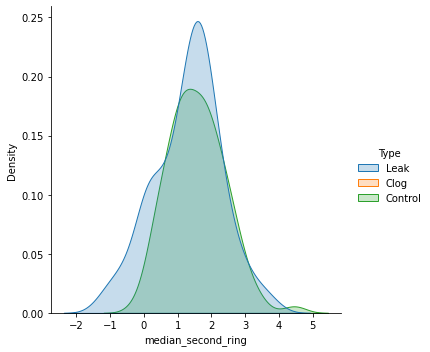

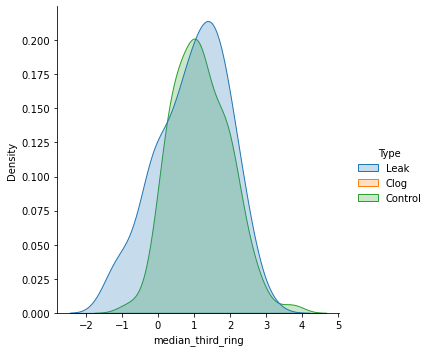

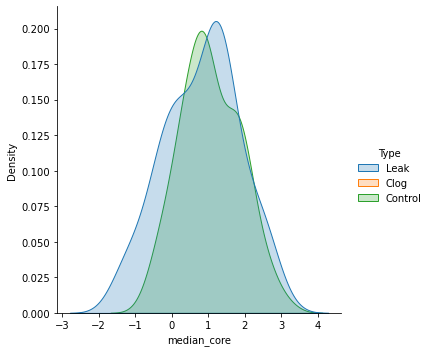

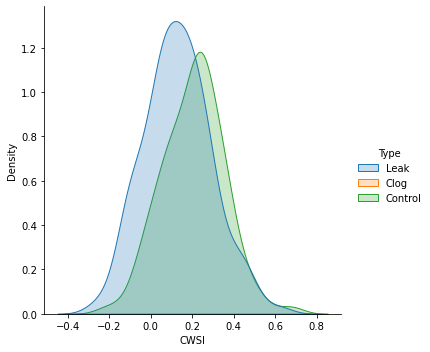

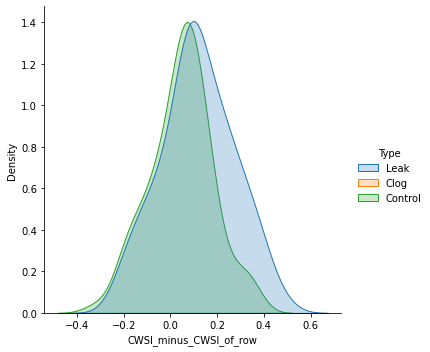

In [62]:
#sns.color_palette("tab10")
for i in df_out1.drop(['RTK_Num_All_Plots_Data','Plot_All_Plots_Data'],axis=1):
    sns.displot(df_out, x=i, hue="Type",hue_order=['Leak','Clog','Control'],  kind="kde",fill=True)